## Trabalho Covid 
### Cinthya Oestreich e Renato Suguiy

In [1]:
# %load LBP_feature_extractor
import numpy as np
from skimage.feature import local_binary_pattern
from PIL import Image
import os
import pandas as pd
import imghdr
import matplotlib.pyplot as plt


NRI_UNIFORM_FEATURE_NUMBER = 59

# Setting up the train and test directories
train_directory = 'C:\\Users\\cinth\\Documents\\Aplicacoes em Multimidia\\Raw Dataset (RYDLS-20)' #Diretorio que voces decompacataram a RYDLES.
lbp_extractor = 'nri_uniform'

# Setting up the resulting matrices directories
feature_matrix_train_path = 'Feature Matrix Train'

class LocalBinaryPatterns:
    def __init__(self, numPoints, radius):
        self.numPoints = numPoints
        self.radius = radius

    # LBP Feature Extractor from Skimage
    def describe_lbp_method_ag(self, image):
        lbpU = local_binary_pattern(image, self.numPoints, self.radius, method='nri_uniform')
        hist0, nbins0 = np.histogram(np.uint8(lbpU), bins=range(60), normed=True)

        #Exibe no console o vetor de características:
        print(hist0)

        return hist0

# Function to load an image from a path
def open_img(filename):
    img = Image.open(filename)
    return img

# Verify if a given image is using a valid format
def verify_valid_img(path):
    possible_formats = ['png','jpg','jpeg','tiff','bmp','gif']
    if imghdr.what(path) in possible_formats:
        return True
    else:
        return False

# Feature extraction call
def feature_extraction(image, lbp_extractor):
    lbp = LocalBinaryPatterns(8, 2) #Paramametros do LBP.
    image_matrix = np.array(image.convert('L'))
    img_features = lbp.describe_lbp_method_ag(image_matrix)

    return img_features.tolist()

def create_columns(column_number, property):
    columns = []
    for i in range(0, column_number):
        columns.append(str(i))

    columns.append(property)
    return columns

# Function to create the training feature matrix, it has the expected class for each sample
def create_feature_matrix_train(train_directory, lbp_extractor):
    # Variable to store the data_rows
    rows_list = []

    print("Started feature extraction for the training dataset")

    # Iterate over subdirectories in training folder (1 folder for each class)
    for dir in os.listdir(train_directory):

        print("Estou em", dir);

        # This is the path to each subdirectory
        sub_directory = train_directory + '\\' + dir

        # Retrieve the files for the given subdirectory
        training_filelist = os.listdir(sub_directory)

        # Iterate over all the files in the class folder
        for file in training_filelist:
            file_path = sub_directory + '\\' + file

            if verify_valid_img(file_path):
                print("Processing: "+file_path)

                image = open_img(file_path)
                img_features = feature_extraction(image, lbp_extractor)

                # The name of the directory is the class
                img_features.append(dir)

                rows_list.append(img_features)
            else:
                print("The following file is not a valid image: "+file_path)

    # Creating a dataframe to store all the features
    columns = create_columns(NRI_UNIFORM_FEATURE_NUMBER, 'class')

    feature_matrix = pd.DataFrame(rows_list, columns=columns)

    print("Finished creating Training Feature Matrix")

    return feature_matrix






if not os.path.isdir(feature_matrix_train_path):
    print('Creating Directory: '+feature_matrix_train_path)
    os.mkdir(feature_matrix_train_path)


feature_matrix_train = create_feature_matrix_train(train_directory, lbp_extractor)
print("Saving Training Feature Matrix to CSV")
feature_matrix_train.to_csv(feature_matrix_train_path + '\\feature_matrix_train.csv', index=False)




print('FIM')




Started feature extraction for the training dataset
Estou em COVID-19
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\COVID-19\1066.jpg


C:\Users\cinth\anaconda3\envs\ML\lib\site-packages\ipykernel_launcher.py:28: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.


[0.03010635 0.01122175 0.00165833 0.01079857 0.00179964 0.01224531
 0.00155889 0.00837313 0.00140786 0.005049   0.00571517 0.00651817
 0.00694883 0.00661462 0.00573387 0.00513349 0.00480451 0.01312232
 0.00399105 0.01635673 0.00810771 0.01906479 0.00445087 0.01413616
 0.00558658 0.01360905 0.00896903 0.00995894 0.01821394 0.02054592
 0.01187297 0.00984754 0.0130498  0.02313434 0.00665499 0.01909619
 0.00783332 0.03635835 0.00900192 0.02234705 0.00680228 0.00975632
 0.00911482 0.00984903 0.01186101 0.01324045 0.01435523 0.01366289
 0.01125315 0.01582813 0.00467218 0.01421766 0.00623929 0.01966068
 0.00602695 0.02196873 0.0070849  0.21489699 0.14851229]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\COVID-19\1067.jpg
[0.07986768 0.01301283 0.00770478 0.0118226  0.00769075 0.01307456
 0.0078086  0.01182934 0.0075095  0.01172103 0.01182485 0.01173843
 0.01151902 0.01190117 0.01171542 0.01161554 0.01136638 0.0139786
 0.00825921 0.013863   0.00988098 0.0

[0.00731023 0.00624896 0.00026244 0.00529186 0.00026544 0.00644629
 0.00022588 0.00510003 0.00025693 0.00325144 0.00338817 0.00283074
 0.00285378 0.00336463 0.00319535 0.00258683 0.00248616 0.02123454
 0.00460421 0.02355191 0.00467733 0.0230651  0.00451005 0.02201534
 0.00375629 0.01999446 0.02116392 0.0220484  0.02445142 0.02598749
 0.0210352  0.02192369 0.02096158 0.0426664  0.01042945 0.05819389
 0.01179023 0.05158132 0.01127186 0.05348901 0.01118522 0.0103383
 0.01023813 0.01197554 0.01283648 0.01154232 0.01164349 0.01267421
 0.0120692  0.01567173 0.00350787 0.01546939 0.00421005 0.01708659
 0.00372824 0.01698793 0.00422858 0.15558437 0.07925413]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\COVID-19\1079.jpg
[0.05349473 0.01193484 0.00351695 0.01723467 0.00372589 0.01277453
 0.00330408 0.01531817 0.00315114 0.00779532 0.00828984 0.00989488
 0.01033209 0.00907844 0.00843132 0.00827412 0.00806878 0.01640971
 0.00829966 0.01787066 0.0085443  0.0

[0.07805765 0.01474515 0.00653367 0.01769274 0.00653797 0.01481672
 0.00583221 0.01642724 0.00576635 0.00736828 0.00796667 0.00825299
 0.0082716  0.00831168 0.0074828  0.00710487 0.00699321 0.00933096
 0.00910334 0.01058072 0.00797956 0.01114475 0.00898022 0.0091334
 0.00626454 0.00994796 0.01473799 0.01362566 0.01192496 0.01218407
 0.01525621 0.01384326 0.01043326 0.00990788 0.00772903 0.01449319
 0.00860372 0.01234584 0.00917492 0.01526194 0.00755009 0.0081585
 0.00829737 0.00898022 0.00949559 0.00974468 0.01008682 0.0101584
 0.00885424 0.01082981 0.01257489 0.01098585 0.01154702 0.01198365
 0.01380604 0.01201801 0.01167157 0.1075508  0.23555727]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\COVID-19\1090.jpg
[0.06272451 0.01357284 0.00464097 0.01649178 0.00468547 0.01390678
 0.00429481 0.01488954 0.00426743 0.00816815 0.00885315 0.00963691
 0.00980951 0.00896218 0.00834759 0.00850112 0.00834123 0.01435171
 0.00808014 0.01530416 0.00933377 0.016

[0.04917504 0.01339701 0.00301083 0.01618515 0.00326091 0.01492631
 0.00239195 0.01165345 0.00218542 0.00553906 0.00700022 0.00817336
 0.00878663 0.00820076 0.00633989 0.00531216 0.004871   0.01089828
 0.00512249 0.01577069 0.00721026 0.01898524 0.00573505 0.01175812
 0.0037372  0.0090915  0.01108023 0.01137667 0.01474507 0.01617953
 0.01330709 0.01154457 0.00909642 0.01303453 0.00612563 0.01785986
 0.00811857 0.02557099 0.00973989 0.02029115 0.00646423 0.00890675
 0.00837849 0.00953336 0.01204052 0.01394354 0.01505205 0.01400746
 0.01077043 0.01598494 0.00664687 0.01442333 0.00754394 0.02054194
 0.00923762 0.02273929 0.00848948 0.14157722 0.20693039]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\COVID-19\1101.jpg
[0.08023166 0.0174536  0.0059745  0.01841477 0.00609045 0.01713321
 0.00446715 0.01419478 0.00446104 0.0060813  0.00726216 0.00756119
 0.00702111 0.00702721 0.00633761 0.00497672 0.00484551 0.00830572
 0.00839421 0.01086578 0.00864137 0.

 0.00608688 0.01213226 0.01016999 0.08779808 0.16958042]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\COVID-19\1111.jpg
[0.04462293 0.00899973 0.00325039 0.01416559 0.00360254 0.01031403
 0.00360696 0.01349665 0.00287025 0.00682052 0.00764712 0.00958174
 0.01035234 0.00878608 0.00887154 0.00975265 0.00862548 0.01561397
 0.00874925 0.01686639 0.0115193  0.01987367 0.01120841 0.01893509
 0.00942113 0.01752502 0.01708004 0.01946258 0.0195112  0.02094633
 0.02172135 0.02331413 0.01856231 0.02077394 0.0105822  0.02002396
 0.01148836 0.02363682 0.01321817 0.02495996 0.01298979 0.0134215
 0.01164454 0.00976297 0.01052915 0.01288812 0.01398583 0.01225896
 0.01236505 0.01287928 0.00915886 0.01087836 0.00575081 0.01171379
 0.00957437 0.01295443 0.00651994 0.08677048 0.15359363]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\COVID-19\1112.jpg
[0.02933353 0.00929502 0.00215579 0.0086167  0.00231691 0.00925152
 0.00237813

 0.0102432  0.014973   0.00987777 0.09598993 0.197028  ]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\COVID-19\1123.jpg
[0.09659055 0.02044565 0.00553603 0.02165415 0.00616836 0.02203955
 0.00466065 0.0161123  0.00426847 0.00507316 0.00650535 0.00710863
 0.00758215 0.00735846 0.00570356 0.00452992 0.00424135 0.0050964
 0.00321975 0.00816412 0.00507801 0.00912375 0.00359837 0.00563674
 0.00247412 0.00374072 0.00392471 0.00499666 0.00721805 0.00762475
 0.00585074 0.00468098 0.00352768 0.00499279 0.00334563 0.0069014
 0.00515063 0.01100912 0.00578587 0.00777969 0.00380463 0.00574907
 0.005476   0.00665254 0.00875869 0.00923802 0.00973672 0.00960502
 0.00742043 0.01133933 0.01250038 0.01080577 0.01576564 0.01473822
 0.01688408 0.01572012 0.01725592 0.14192075 0.30212968]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\COVID-19\1124.jpg
[0.0539619  0.01247166 0.00318122 0.01721972 0.00319054 0.01247587
 0.00291904 

[0.0806355  0.01595063 0.00820903 0.01333508 0.00947479 0.01601891
 0.00621324 0.01038866 0.00610819 0.00642332 0.00776261 0.00837185
 0.00844013 0.00815126 0.00676996 0.00554097 0.00503151 0.00722164
 0.00905987 0.01003151 0.01273109 0.01053046 0.00959559 0.00865546
 0.0063813  0.01261029 0.01307248 0.01254202 0.02542017 0.02357668
 0.013125   0.01393382 0.01445903 0.01171218 0.00694328 0.01388655
 0.00863445 0.02217437 0.00866071 0.01516282 0.00826681 0.00603992
 0.00611345 0.00794118 0.00951155 0.00988445 0.00983718 0.01
 0.00827206 0.01029937 0.00749475 0.00989496 0.0119958  0.0142542
 0.00934349 0.01565126 0.01255777 0.10255252 0.21714286]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\COVID-19\1140.jpg
[0.03419002 0.01017335 0.00404236 0.01022192 0.00371854 0.00984413
 0.00236928 0.00935301 0.00250421 0.00748025 0.0084679  0.00812789
 0.00809011 0.0081063  0.00627672 0.0054078  0.00537002 0.01547861
 0.01817711 0.01935365 0.01258042 0.0196990

 0.00951101 0.01423405 0.01081566 0.10373442 0.21286796]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\COVID-19\1150.jpg
[0.02115452 0.0105434  0.00118128 0.00798306 0.00122965 0.01062079
 0.00113829 0.00754129 0.00116193 0.00604507 0.00634066 0.00538725
 0.00562372 0.00651801 0.00597843 0.00500889 0.00486594 0.01841145
 0.00645567 0.02168658 0.00872257 0.02169625 0.00667924 0.01942613
 0.00694044 0.02244866 0.01717642 0.01958306 0.03100678 0.02792512
 0.02043865 0.020099   0.0239696  0.03059403 0.01148176 0.02978465
 0.01319833 0.03801171 0.01374221 0.03216656 0.01216968 0.01139792
 0.01103892 0.01254911 0.0136143  0.01258888 0.01273076 0.01432479
 0.01332409 0.01512557 0.00429518 0.01418936 0.00509381 0.01561786
 0.00448543 0.01609618 0.00553988 0.10905524 0.12679597]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\COVID-19\1151.jpg
[0.03763057 0.01493894 0.00184063 0.01436311 0.00184622 0.01484435
 0.0018709

[0.03296324 0.01304877 0.00399388 0.01160501 0.00320923 0.0125309
 0.00225195 0.00669308 0.00206364 0.00666954 0.01041233 0.00884303
 0.00923536 0.00965907 0.00722665 0.00433128 0.0039468  0.0104908
 0.01080466 0.0253835  0.01252305 0.02495194 0.0116207  0.01221703
 0.00367217 0.01130684 0.01998509 0.02817686 0.03381851 0.03355957
 0.02575229 0.02769822 0.01080466 0.01047511 0.00840363 0.02811409
 0.01651693 0.05327788 0.01617953 0.02958923 0.00987877 0.00593197
 0.00512378 0.00973753 0.0168151  0.01597552 0.0155675  0.01541842
 0.01045941 0.00684217 0.00375848 0.00717172 0.00773667 0.01746636
 0.00707756 0.01570874 0.00828593 0.07436149 0.13267684]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\MERS\1019.jpg
[0.0044803  0.00486252 0.00016672 0.00349091 0.00017327 0.00519013
 0.00014197 0.00324047 0.00015653 0.0026777  0.00298857 0.00235518
 0.0022882  0.00314073 0.00290994 0.00190162 0.00182517 0.02291186
 0.00513699 0.02776128 0.00494333 0.028288

 0.007907   0.01673561 0.00703626 0.11126953 0.16118612]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\Normal\108.jpg
[0.0420801  0.01297337 0.00283868 0.01477995 0.00277806 0.01333257
 0.00231581 0.0107197  0.00232187 0.00642    0.00772795 0.00799166
 0.00799469 0.00751273 0.00698531 0.00562281 0.00553187 0.01352656
 0.00754911 0.01718214 0.00979368 0.01853101 0.00729904 0.01376602
 0.00552126 0.0139873  0.01680021 0.01672595 0.01993292 0.02130149
 0.01789901 0.0154953  0.01481026 0.01611669 0.0084721  0.02403863
 0.00972094 0.02993424 0.01074547 0.02464031 0.0084039  0.00877976
 0.008657   0.01051813 0.01272027 0.01302036 0.01369479 0.01327952
 0.01125622 0.01357657 0.00637453 0.01318404 0.00783101 0.01825366
 0.00882371 0.01774139 0.00794013 0.10967198 0.18255627]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\Normal\109.jpg
[0.06948978 0.01411187 0.0062253  0.01621302 0.00603774 0.01369878
 0.00479402 0.01

Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\Normal\118.jpg
[0.07784607 0.01571948 0.0064218  0.0170972  0.00635706 0.01576014
 0.00505312 0.01367324 0.00502752 0.0071355  0.00784468 0.00832651
 0.00806301 0.00788684 0.00689158 0.00600171 0.00611915 0.0092751
 0.00876316 0.01081693 0.00966959 0.01126713 0.00807054 0.00961237
 0.00602128 0.01164958 0.01369131 0.01217206 0.01740135 0.01676444
 0.01269755 0.01277434 0.01181671 0.0111798  0.00729661 0.0155659
 0.00795611 0.01728842 0.00841083 0.01364915 0.00759926 0.00754354
 0.0072936  0.00864873 0.00937899 0.00994513 0.00950095 0.00983221
 0.00859452 0.01044502 0.01005806 0.01018755 0.01215399 0.01298062
 0.01342028 0.01318088 0.01205913 0.1076363  0.23450637]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\Normal\119.jpg
[0.06680023 0.01415308 0.00570514 0.01580755 0.00583222 0.01396591
 0.00449664 0.01309709 0.0046607  0.00742661 0.00817066 0.0085889
 0.008337

 0.01341893 0.01341078 0.01236199 0.11249427 0.24123414]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\Normal\126.jpg
[0.05740018 0.01143579 0.0046011  0.01724392 0.00500085 0.01182002
 0.00370843 0.01351802 0.0038792  0.00756047 0.00849971 0.00977466
 0.00977854 0.00889364 0.00763809 0.00741687 0.00724415 0.01210335
 0.01027921 0.01561578 0.01050043 0.01587194 0.01078958 0.0130193
 0.00692202 0.01184525 0.01882161 0.01965993 0.01838886 0.0188643
 0.01858292 0.02104162 0.01303482 0.01337054 0.00909546 0.0206341
 0.01143579 0.02092325 0.01126502 0.02140839 0.00975914 0.0090974
 0.00904112 0.00931475 0.01118934 0.01253221 0.01291257 0.01186272
 0.00955732 0.01033549 0.00937684 0.01054119 0.00777393 0.01305423
 0.01183361 0.01380329 0.00804173 0.09120106 0.18988496]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\Normal\1262.jpg
[0.05502    0.0161981  0.00403788 0.01317296 0.00396222 0.01623157
 0.00336418 0.01096

 0.01465484 0.01265176 0.01130056 0.10640715 0.23245568]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\Normal\1303.jpg
[0.0799853  0.01568013 0.00643334 0.01792989 0.00674595 0.01646663
 0.00488861 0.01317763 0.00476723 0.00638512 0.00761393 0.00834888
 0.00850685 0.00792487 0.00670105 0.00570005 0.00551715 0.00866149
 0.00784339 0.01039245 0.00924014 0.0115431  0.00777023 0.0094297
 0.00589626 0.01022118 0.01248258 0.01219991 0.01585473 0.01584309
 0.01229801 0.01309116 0.01156306 0.0106851  0.00703029 0.01381448
 0.00794981 0.01677425 0.0087413  0.01393087 0.00721984 0.0068374
 0.00665782 0.0080978  0.00944134 0.00992521 0.01003329 0.00964087
 0.00811609 0.01041241 0.01008151 0.0102295  0.01180915 0.01350853
 0.01387933 0.01417198 0.01227307 0.11103961 0.24059608]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\Normal\1304.jpg
[0.07692067 0.01467067 0.00692067 0.01824519 0.00673317 0.01444712
 0.00521875 0.01

 0.01409635 0.01430391 0.01217028 0.11533009 0.24586115]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\Normal\1347.jpg
[0.08808392 0.0166564  0.00676056 0.01851379 0.00680604 0.01679724
 0.00508509 0.01391138 0.00510417 0.00644366 0.00748239 0.00785945
 0.00769953 0.00745158 0.00650968 0.00513204 0.00487383 0.00786532
 0.00691755 0.01055604 0.00869572 0.00960681 0.00764231 0.00819836
 0.00477993 0.00819689 0.01221684 0.0109375  0.01553991 0.01199971
 0.0110534  0.01298709 0.00878081 0.0084331  0.00609155 0.01217723
 0.00786532 0.01506455 0.00721538 0.01313087 0.00638938 0.00609595
 0.00594043 0.00794748 0.00897154 0.00945863 0.00898621 0.0091564
 0.00790346 0.01042547 0.01066608 0.00998826 0.0128213  0.01349619
 0.01473885 0.01369718 0.01285211 0.11946156 0.25388058]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\Normal\135.jpg
[0.0519042  0.0127745  0.00428909 0.0165576  0.0041609  0.0126733
 0.0031523  0.011

[0.0785617  0.01477341 0.00643142 0.01670607 0.00658462 0.0152006
 0.00524854 0.01387631 0.00520435 0.00682178 0.0076084  0.00774098
 0.00797667 0.00802528 0.0072637  0.00594678 0.00569194 0.00915512
 0.00831695 0.01131906 0.00854527 0.01278476 0.00924645 0.00949687
 0.00564333 0.00977528 0.01536705 0.01456276 0.0150091  0.01732476
 0.0157088  0.01547606 0.01056927 0.01008905 0.00724602 0.01484706
 0.00859683 0.01561895 0.00952486 0.01605203 0.00764081 0.00728138
 0.00707662 0.00802233 0.00924351 0.00936135 0.00998151 0.00969868
 0.00879422 0.0104087  0.01038219 0.01036156 0.01145458 0.01263598
 0.01316187 0.01296448 0.01165345 0.10916617 0.2307724 ]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\Normal\142.jpg
[0.08332658 0.01631268 0.00670754 0.01764369 0.0066085  0.01625116
 0.0052775  0.01408134 0.00543206 0.00709319 0.00793951 0.00759438
 0.00762139 0.00799503 0.00697614 0.00574868 0.00608481 0.00836717
 0.00752385 0.0113443  0.00826513 0.0112

[0.0769671  0.01589313 0.00619237 0.01650543 0.00622305 0.01535153
 0.00510651 0.01344927 0.00521056 0.00698343 0.00758105 0.00811331
 0.00818402 0.00748634 0.00685136 0.00606431 0.00632177 0.0098595
 0.00785185 0.01156968 0.01037042 0.01151899 0.00805462 0.00945531
 0.00699543 0.01196454 0.0137841  0.01196854 0.01679891 0.01728982
 0.01337856 0.0142003  0.01178978 0.01224601 0.00760907 0.01397752
 0.00868826 0.01842771 0.00880565 0.01437772 0.00750635 0.00745299
 0.00755171 0.00850551 0.00929389 0.01003826 0.00982749 0.00908846
 0.00848416 0.01051583 0.01015565 0.01104542 0.01179379 0.01301172
 0.01265821 0.01260352 0.01148964 0.10738069 0.2321299 ]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\Normal\146.jpg
[0.0781909  0.01481883 0.00665435 0.01791391 0.00680552 0.0149929
 0.00476859 0.01285978 0.00481898 0.00680399 0.00802706 0.00895696
 0.00900124 0.00786062 0.00643753 0.0057214  0.00579469 0.00971889
 0.00763922 0.01226733 0.01072666 0.01219

[0.08060972 0.01483591 0.00685811 0.01763353 0.00733912 0.01485843
 0.00545528 0.01384331 0.00539093 0.00660393 0.00783784 0.00810811
 0.00821589 0.00807754 0.00731499 0.0060119  0.00584781 0.00845077
 0.00899936 0.01131435 0.00878057 0.01084138 0.0095962  0.0093018
 0.00555019 0.00949646 0.0142278  0.01440476 0.01452059 0.01335746
 0.01530405 0.01590573 0.01087033 0.00914254 0.00705277 0.01520592
 0.0087323  0.01405888 0.00873874 0.0160473  0.00776705 0.0067825
 0.00694337 0.00781692 0.00937741 0.00981499 0.00982304 0.00989382
 0.0087677  0.01018822 0.01082851 0.01029118 0.01129505 0.01297941
 0.01382079 0.01337999 0.01144627 0.1083816  0.23565959]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\Normal\1509.jpg
[0.0815988  0.0155289  0.00662872 0.01763132 0.00628612 0.01547457
 0.00499871 0.0132831  0.00489759 0.00676305 0.00753127 0.00821195
 0.00820591 0.0075856  0.0067223  0.00564619 0.00588012 0.00957482
 0.00793424 0.01052717 0.0098797  0.0110

 0.01318314 0.01375282 0.01189187 0.11285425 0.23345613]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\Normal\1535.jpg
[0.08243726 0.01550449 0.00690542 0.01703642 0.00665843 0.0153119
 0.00548229 0.01442832 0.0056249  0.00706126 0.0080948  0.00828298
 0.00774636 0.00772137 0.00690248 0.00618651 0.00607477 0.00908717
 0.00928417 0.01062938 0.00850351 0.01026184 0.00828004 0.00907688
 0.00590864 0.01038386 0.01469295 0.01315221 0.01435187 0.01275379
 0.01301401 0.01356239 0.0107764  0.00962231 0.00713477 0.01539717
 0.00827563 0.01413723 0.00810215 0.01398433 0.00706273 0.00706861
 0.00711419 0.00846969 0.00952528 0.00968994 0.00926947 0.00924301
 0.00796395 0.01029271 0.01140711 0.01042356 0.01214073 0.01288169
 0.01390935 0.012423   0.01173937 0.11026919 0.24127376]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\Normal\1539.jpg
[0.06991771 0.01353653 0.00570514 0.01679068 0.00592795 0.01383016
 0.00438896 0.0

[0.08387802 0.01447848 0.00671125 0.01942929 0.00707118 0.01522076
 0.00518469 0.01439445 0.00503344 0.00622527 0.00729666 0.00818739
 0.00817198 0.00790869 0.00675887 0.00541158 0.00524631 0.00753755
 0.00814117 0.01107104 0.00918315 0.01065089 0.00947586 0.00862295
 0.00471832 0.00800532 0.01351073 0.01168306 0.01549105 0.0148006
 0.0131424  0.01498267 0.00891565 0.00814957 0.00579812 0.01360457
 0.00815658 0.01674731 0.00800672 0.01573054 0.00664403 0.00639053
 0.00621547 0.00722384 0.00875179 0.0098764  0.00962711 0.00939043
 0.00789888 0.01011869 0.01114807 0.00960611 0.01129652 0.01284409
 0.01502889 0.01336788 0.01213823 0.11525647 0.24444242]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\Normal\1566.jpg
[0.07268171 0.01528108 0.00585875 0.01597532 0.00587106 0.01456528
 0.00467807 0.01354623 0.00501672 0.00740271 0.00734883 0.00769672
 0.00795072 0.00794918 0.00697169 0.00543851 0.00590955 0.00941617
 0.00991954 0.01149275 0.00914679 0.012

 0.01324293 0.01304898 0.01184911 0.11221565 0.23930473]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\Normal\1605.jpg
[0.0840282  0.01604551 0.00700369 0.01745554 0.00693959 0.01686268
 0.00519468 0.0131918  0.0051402  0.00705015 0.00747156 0.00788656
 0.00786412 0.007917   0.00697805 0.00585643 0.0058324  0.00931742
 0.00771992 0.00999199 0.008473   0.01052556 0.00787534 0.00926775
 0.00537254 0.01006569 0.01310046 0.01157026 0.01421727 0.01437109
 0.01168723 0.01303637 0.01044865 0.00984938 0.00748278 0.01310046
 0.00767185 0.0145826  0.0080532  0.01362442 0.00774716 0.00716071
 0.00687871 0.00839929 0.00921807 0.00920205 0.00945361 0.00957699
 0.00875661 0.01044063 0.00975485 0.01014901 0.01212145 0.01359077
 0.01358917 0.01400096 0.01272873 0.11429418 0.24281365]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\Normal\1608.jpg
[0.08127928 0.01552959 0.00683816 0.01767111 0.00673789 0.01530243
 0.00514624 0.

[0.08470718 0.01619713 0.00661318 0.01692852 0.00656475 0.01606797
 0.00543941 0.01486513 0.00547008 0.00621277 0.00723155 0.00790643
 0.00754478 0.00769493 0.00680531 0.00567029 0.00558633 0.00808242
 0.00701682 0.00997305 0.00879121 0.01043643 0.00849251 0.00887839
 0.00548784 0.0099004  0.0111662  0.01102412 0.01453253 0.01381244
 0.01325704 0.01322475 0.00974379 0.00940635 0.00626767 0.01241263
 0.00756576 0.01507502 0.00799039 0.01481346 0.00675849 0.00702005
 0.00692802 0.00774659 0.00896881 0.00932401 0.00907375 0.00925619
 0.00834559 0.01157307 0.0112098  0.01082715 0.01200577 0.01308106
 0.0132522  0.01320699 0.01211233 0.11660416 0.24784902]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\Normal\165.jpg
[0.0799011  0.01588938 0.00623727 0.0171264  0.00635011 0.01517849
 0.00474777 0.0139316  0.00516105 0.00668581 0.00786923 0.008188
 0.00812312 0.00761393 0.00633883 0.0056378  0.00572243 0.00889185
 0.00808222 0.01217551 0.00882979 0.01149

 0.01407028 0.01359722 0.01194152 0.11252709 0.24114135]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\Normal\1665.jpg
[0.07658333 0.01604924 0.00643924 0.01684673 0.00584767 0.01478931
 0.00493152 0.01363234 0.00523515 0.007406   0.00837799 0.00761017
 0.00703081 0.00721579 0.00694879 0.00601345 0.00573947 0.00999565
 0.00974262 0.0114423  0.00863102 0.01042494 0.00889976 0.00973215
 0.00551262 0.01071462 0.01721319 0.01433036 0.01507201 0.01374926
 0.01415935 0.01532679 0.01067622 0.01018936 0.00759446 0.01771227
 0.00847397 0.01512785 0.00784226 0.01596199 0.00744264 0.00709363
 0.00702383 0.00896782 0.00996773 0.00955765 0.00881425 0.00916152
 0.00858565 0.01067797 0.01005324 0.01096939 0.01193964 0.01388014
 0.01278425 0.01285754 0.01106712 0.10932049 0.23461344]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\Normal\1680.jpg
[0.0792847  0.01446477 0.00610327 0.01822236 0.00658143 0.01533505
 0.00487472 0.

[0.06461118 0.01199958 0.00566367 0.01687336 0.0057505  0.01282308
 0.00498722 0.01439725 0.00459508 0.00728686 0.00843528 0.00917335
 0.00908232 0.00911593 0.00807675 0.00743811 0.00715801 0.01105143
 0.00998144 0.01310458 0.00867477 0.0145261  0.01099541 0.01176429
 0.00646476 0.01134974 0.01868842 0.01815483 0.01437345 0.01542943
 0.02067995 0.01909037 0.01135815 0.01174049 0.00870138 0.01910857
 0.00971815 0.01654704 0.01060187 0.0210903  0.0090445  0.00912013
 0.00855712 0.00914954 0.01056406 0.01132733 0.0115136  0.01130773
 0.01001646 0.01145618 0.01002626 0.01077273 0.00816638 0.01388327
 0.01207101 0.01407794 0.00893246 0.09690977 0.20244109]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\Normal\1710.jpg
[0.04391209 0.01235157 0.00322164 0.01435412 0.00345519 0.01268119
 0.00267007 0.01041527 0.00270154 0.00574761 0.00731951 0.0073311
 0.00764416 0.0074338  0.00585693 0.00470078 0.00478195 0.01108113
 0.00726154 0.0170126  0.00809138 0.018

[0.07885478 0.0157266  0.00648433 0.01694301 0.00623774 0.01534638
 0.00509158 0.0137897  0.00520317 0.00705052 0.00781922 0.00779166
 0.00784952 0.00810162 0.00694995 0.00580242 0.00572665 0.00887721
 0.00811815 0.0109312  0.0093938  0.01151116 0.00830413 0.0091417
 0.00598426 0.01009224 0.0147182  0.01333096 0.01506535 0.01582578
 0.01424431 0.01376077 0.01082788 0.0104821  0.00695409 0.01473749
 0.00829449 0.01689342 0.00880006 0.01473198 0.00714971 0.00712491
 0.00698164 0.00848046 0.00954121 0.00960595 0.00940207 0.00960871
 0.00848322 0.01058404 0.0101501  0.01090916 0.01189827 0.01371256
 0.01274135 0.01335438 0.01150979 0.11133979 0.23563309]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\Normal\173.jpg
[0.0621325  0.01021165 0.00591398 0.0186879  0.00589016 0.01106404
 0.00418708 0.01377263 0.00413944 0.0066847  0.00861576 0.00969443
 0.00998537 0.00900708 0.00740268 0.00646522 0.00610113 0.01120015
 0.01208997 0.0141129  0.00938478 0.0157

[0.04814095 0.01189731 0.00355064 0.01540924 0.00328446 0.01171986
 0.00288762 0.01413965 0.00307152 0.00696093 0.00751265 0.0077998
 0.0075433  0.00721098 0.00679962 0.00653505 0.00677058 0.01520597
 0.00880804 0.01588029 0.0076659  0.01625939 0.00888386 0.0143897
 0.00613337 0.01426225 0.02176845 0.01960515 0.01786452 0.01910022
 0.02266377 0.02030044 0.01391058 0.01546247 0.01021959 0.02480771
 0.00957915 0.02072794 0.01042124 0.02521907 0.00937911 0.00984049
 0.01005666 0.01086648 0.0111875  0.01186343 0.01140529 0.01124558
 0.01021314 0.01246838 0.009121   0.01303461 0.00732068 0.01558023
 0.00983887 0.01487688 0.00714645 0.0971982  0.18698378]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\Normal\1769.jpg
[0.07930732 0.01446464 0.00645003 0.017217   0.00691531 0.01534278
 0.0051787  0.01365204 0.00497391 0.0065385  0.00807195 0.00765255
 0.00835866 0.00839634 0.00720529 0.00569804 0.0054441  0.00854543
 0.00948582 0.0099855  0.00863717 0.0122

[0.08162839 0.01539033 0.00677536 0.01757182 0.00693815 0.01530893
 0.00495794 0.0132784  0.00512814 0.00694407 0.00791346 0.00771218
 0.00786314 0.00784094 0.00679164 0.00556325 0.00547445 0.00869193
 0.01013936 0.01091635 0.00770479 0.01108654 0.00930317 0.00893021
 0.00472558 0.00877777 0.01589204 0.01381119 0.01393551 0.0133598
 0.01443574 0.01491082 0.00960212 0.00895241 0.00675908 0.01748302
 0.00821538 0.01380823 0.00847882 0.01615252 0.00702547 0.0064838
 0.00654004 0.00845218 0.00964948 0.00956364 0.00973236 0.00949112
 0.0083101  0.01026367 0.01006388 0.01050491 0.01168742 0.01366023
 0.01350039 0.01372979 0.01160306 0.11202278 0.2385627 ]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\Normal\1800.jpg
[0.04842458 0.01191515 0.0043995  0.01618631 0.00421301 0.01284357
 0.00285947 0.0104072  0.00268903 0.00561267 0.00777031 0.00806508
 0.00834582 0.00820946 0.00617815 0.00456995 0.00430325 0.01028488
 0.00904565 0.01703052 0.00853832 0.0184

[0.08285412 0.01593151 0.00654923 0.01839367 0.00680077 0.01652088
 0.00505284 0.01452141 0.00470399 0.0060535  0.00748379 0.00784366
 0.00835775 0.00845139 0.00668143 0.00526766 0.00541455 0.00788772
 0.00711474 0.0098468  0.00874883 0.01271106 0.00747461 0.00787487
 0.00472969 0.00873415 0.0119142  0.01133401 0.0133041  0.01582502
 0.01402017 0.01107329 0.00872497 0.0085891  0.00625179 0.01289099
 0.00737179 0.01630606 0.00972562 0.0140679  0.00637664 0.00655474
 0.00647212 0.00750398 0.00884247 0.00961362 0.01045821 0.01046739
 0.00765638 0.01045454 0.01075749 0.009979   0.01181506 0.0137723
 0.01429925 0.01442043 0.01290935 0.11614559 0.24809784]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\Normal\183.jpg
[0.06415038 0.01302487 0.00545518 0.01632157 0.0054251  0.01286293
 0.00433545 0.01354078 0.00443725 0.00679005 0.008      0.00818739
 0.00822672 0.0081203  0.00710006 0.00624639 0.00626027 0.01101215
 0.0101284  0.01430654 0.00872412 0.0139

[0.05673832 0.01392143 0.00448219 0.01807648 0.0043582  0.01308514
 0.00291646 0.01185445 0.00313674 0.00664414 0.00819668 0.00943396
 0.00922687 0.00778513 0.00623391 0.0051681  0.00551106 0.01092715
 0.00742634 0.01712412 0.00855546 0.01619813 0.00673383 0.01103399
 0.00462333 0.01126746 0.01518905 0.01474584 0.01912382 0.01854212
 0.01395968 0.01405465 0.01113424 0.01144818 0.00760178 0.01980314
 0.01022144 0.02392786 0.01000908 0.01834426 0.00763607 0.00764267
 0.00793946 0.00983364 0.01301127 0.01424855 0.01379216 0.01208397
 0.00929414 0.01134925 0.00723508 0.01176871 0.00829033 0.01895894
 0.01143103 0.01845638 0.00817689 0.11202566 0.20806161]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\Normal\1911.jpg
[0.08402774 0.01617554 0.00678351 0.01887972 0.00668272 0.0156084
 0.00504621 0.01415637 0.00517433 0.0067391  0.00783751 0.00784776
 0.00798442 0.0079178  0.00648457 0.0054374  0.0058098  0.00874118
 0.00771281 0.01012146 0.00773672 0.011

 0.01314328 0.01332069 0.01216231 0.11033736 0.2384113 ]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\Normal\1941.jpg
[0.08632852 0.0158326  0.00678813 0.01790582 0.00675947 0.01580712
 0.00512095 0.01513357 0.00527382 0.00650788 0.00673558 0.00732793
 0.00754927 0.0072101  0.00627699 0.00564802 0.0057356  0.00969574
 0.00640119 0.00964    0.0082483  0.01098553 0.00672603 0.00908587
 0.00578496 0.01101101 0.01253965 0.01039636 0.0127578  0.01461924
 0.01194571 0.01111292 0.01157151 0.01039955 0.00758908 0.01174507
 0.00739959 0.01393294 0.00887409 0.01198711 0.00716074 0.00697125
 0.00717507 0.00797124 0.00835499 0.00888842 0.00935498 0.00893301
 0.00769417 0.01047598 0.01155877 0.01094572 0.01214475 0.01322595
 0.01421319 0.01292659 0.01214793 0.11651444 0.25095222]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\Normal\195.jpg
[0.06852949 0.01673433 0.0051085  0.01386049 0.0055726  0.01675415
 0.00458988 0.0

[0.07735255 0.01512693 0.00611265 0.0185627  0.00636356 0.01532397
 0.00441016 0.01347216 0.00463182 0.00653905 0.0078721  0.00820921
 0.00808453 0.00823692 0.00661755 0.00504898 0.00513672 0.00884649
 0.00876183 0.01146796 0.00917591 0.01161266 0.00904507 0.00931906
 0.00445942 0.00905738 0.01481137 0.01323818 0.01686791 0.0148437
 0.01435727 0.0150161  0.00925749 0.00866023 0.0065606  0.01625372
 0.00815072 0.01772223 0.008103   0.01678786 0.00680843 0.00622349
 0.00619578 0.00827232 0.00963155 0.01042276 0.01018416 0.00980703
 0.00855556 0.01029961 0.00983166 0.01043354 0.01122629 0.01398937
 0.01399245 0.01472825 0.01137098 0.11185803 0.23669101]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\Normal\1981.jpg
[0.04645733 0.01460316 0.00374501 0.01228269 0.00374501 0.01377111
 0.00279479 0.00980251 0.00319404 0.00733352 0.00829333 0.0078797
 0.00784457 0.00792282 0.00715465 0.00561512 0.00574608 0.01326326
 0.0077168  0.01681982 0.01059463 0.0173

[0.08409128 0.01633864 0.00709452 0.01762291 0.00684461 0.01647588
 0.00516885 0.01368343 0.00532342 0.00671892 0.00777927 0.00818377
 0.0079064  0.00780528 0.00675504 0.00572936 0.00583626 0.00832823
 0.00696595 0.01034925 0.00849147 0.01052549 0.00732711 0.00856948
 0.00588971 0.01008055 0.01132292 0.01115968 0.01415727 0.01369066
 0.01183287 0.01152373 0.01056883 0.0103088  0.00687639 0.01257252
 0.00819821 0.01461666 0.00838168 0.01315326 0.00706419 0.00701651
 0.00680993 0.00821121 0.0093958  0.00960238 0.00940736 0.00967028
 0.00813176 0.01074219 0.01059195 0.01052261 0.01252196 0.0138669
 0.01362709 0.01349708 0.01247429 0.1152546  0.24734335]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\Normal\202.jpg
[0.0796556  0.01625709 0.00588974 0.01703964 0.00627023 0.01638457
 0.00491106 0.01358974 0.00468355 0.00665071 0.00749799 0.00791378
 0.00743131 0.00763528 0.00684292 0.00548179 0.00538569 0.00868653
 0.00820405 0.01136172 0.00956518 0.0107

 0.01392897 0.01405628 0.01274386 0.11748304 0.25035522]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\Normal\223.jpg
[0.08153027 0.01318892 0.00617269 0.0208409  0.00668066 0.01515772
 0.00488581 0.01499301 0.00442094 0.00613267 0.00774588 0.00890191
 0.0092421  0.00905892 0.00704856 0.00566779 0.0051906  0.0078798
 0.0069716  0.01138792 0.00709012 0.01318585 0.00764582 0.00873104
 0.00380675 0.00698237 0.01227457 0.01166499 0.01210678 0.01267017
 0.01420026 0.01219606 0.00752883 0.0075473  0.00569396 0.01380465
 0.0081815  0.01412637 0.00917129 0.01549483 0.00622195 0.00697468
 0.0062358  0.00760118 0.00955766 0.01102617 0.01153877 0.01108005
 0.0087295  0.01162805 0.01101848 0.01019186 0.00936371 0.01465282
 0.01531627 0.01614443 0.01083838 0.11814616 0.2465319 ]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\Normal\224.jpg
[0.08095651 0.01442688 0.00687009 0.01898106 0.00653968 0.01390462
 0.00507796 0.014

[0.03992149 0.01316456 0.00277359 0.01321743 0.00256529 0.013054
 0.00220798 0.0100689  0.00200449 0.00607114 0.00713187 0.00661112
 0.00638199 0.0070165  0.00633873 0.00462105 0.00455216 0.01325589
 0.00707579 0.01688832 0.00628906 0.01883032 0.00661432 0.01276238
 0.00390482 0.01008012 0.01698125 0.01798109 0.01618971 0.01879026
 0.01755007 0.01846819 0.00984458 0.01426534 0.00776478 0.02782407
 0.00838968 0.0292357  0.00981413 0.02866688 0.00703413 0.00813812
 0.0079875  0.01096619 0.01363403 0.01265983 0.01288896 0.01364525
 0.01119692 0.016108   0.00613684 0.01497356 0.00727287 0.02163435
 0.00760936 0.02183144 0.00768306 0.12713668 0.18629386]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\Normal\238.jpg
[0.08626628 0.01544968 0.00579629 0.0195115  0.00614023 0.01609171
 0.005169   0.01623583 0.0052558  0.00685433 0.00746033 0.00694605
 0.00734732 0.00781246 0.00693131 0.00547527 0.00555225 0.00805814
 0.00735878 0.00990397 0.00503306 0.01017

[0.03953114 0.01306348 0.0024906  0.01305374 0.00245027 0.01508266
 0.00213738 0.0109261  0.00196355 0.00583921 0.00654286 0.00611455
 0.00610065 0.00737306 0.00650949 0.0050396  0.00487134 0.01271443
 0.00627308 0.01452363 0.0061521  0.01779715 0.00662908 0.01500896
 0.00422887 0.01057149 0.01573208 0.01467382 0.01482122 0.01711435
 0.01648301 0.01652751 0.01176325 0.0160992  0.00728824 0.02519941
 0.00697396 0.02977872 0.00857734 0.02848545 0.0081393  0.00934496
 0.00877481 0.01066466 0.01237651 0.01193986 0.01304818 0.01425663
 0.01288687 0.01650387 0.00645804 0.01484069 0.00726321 0.01983441
 0.00751074 0.02277974 0.00877898 0.13202124 0.19007126]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\Normal\249.jpg
[0.09197049 0.01561556 0.00624015 0.02165828 0.00660295 0.01695539
 0.00479908 0.01590074 0.00444809 0.00560399 0.00706699 0.00747535
 0.00809465 0.00798327 0.0062469  0.00500157 0.00463371 0.00659282
 0.00650508 0.00919317 0.00645783 0.010

 0.01332633 0.01293346 0.01147573 0.10895917 0.23552653]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\Normal\260.jpg
[0.07957995 0.01424644 0.00671607 0.01665702 0.00710398 0.0146051
 0.00621425 0.01457893 0.00621117 0.00752421 0.00830773 0.0085494
 0.00867409 0.00890653 0.00824308 0.00725021 0.00706857 0.00938833
 0.00868025 0.01146796 0.00847859 0.01103849 0.00945299 0.01020725
 0.00635125 0.00991478 0.01379696 0.01314121 0.0131643  0.01244851
 0.01424952 0.01561182 0.01101386 0.01031501 0.00761503 0.01440191
 0.00917745 0.01374616 0.00900042 0.01579192 0.00848937 0.00818766
 0.00826309 0.00881109 0.00963463 0.00997943 0.01015184 0.01026421
 0.00934523 0.01086147 0.01133866 0.0106398  0.0113833  0.01215142
 0.01290877 0.01273021 0.01137252 0.10443849 0.23015812]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\Normal\261.jpg
[0.07476602 0.01473708 0.0062879  0.01724381 0.00633214 0.0153269
 0.00491025 0.01373

 0.01482048 0.01473103 0.0127825  0.12499832 0.2580964 ]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\Normal\272.jpg
[0.08906972 0.016974   0.00680065 0.02010366 0.00674383 0.0159513
 0.00448063 0.01448511 0.00511666 0.00632875 0.00724256 0.00766395
 0.00780915 0.00689534 0.00519084 0.00459584 0.00485783 0.0075803
 0.00714786 0.00949787 0.008008   0.01031382 0.00653866 0.0068622
 0.00440488 0.00921694 0.01266856 0.01027436 0.0124697  0.01377333
 0.01121499 0.01056949 0.00842308 0.00803641 0.00594051 0.01304102
 0.00686378 0.01410949 0.00774759 0.01164743 0.00515139 0.00559645
 0.00620249 0.00743352 0.0087119  0.00904333 0.00975985 0.00870559
 0.00650394 0.00978826 0.01093249 0.01073521 0.0128106  0.01456718
 0.01553307 0.01386644 0.01203568 0.12477589 0.26118659]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\Normal\274.jpg
[0.08005947 0.01560425 0.00650032 0.01764247 0.00638863 0.01522383
 0.00526133 0.01448

[0.05310088 0.01482644 0.00304729 0.01649172 0.00363468 0.01609366
 0.00253891 0.01206838 0.002442   0.00629583 0.00749298 0.00718438
 0.00758243 0.008304   0.00679079 0.00479903 0.0048363  0.01124842
 0.00699057 0.01572691 0.00678036 0.01734895 0.00679825 0.01151528
 0.00390601 0.00867224 0.01471463 0.01526475 0.0173087  0.01487117
 0.01623976 0.0137098  0.00938784 0.0121802  0.00627496 0.02213754
 0.00814448 0.02222103 0.00937145 0.02249684 0.0064151  0.00760927
 0.00770021 0.00986044 0.01221299 0.01179407 0.01221896 0.01349959
 0.01057157 0.01405866 0.00718587 0.01325957 0.00860515 0.01805263
 0.01015265 0.0197343  0.00977397 0.11776475 0.21869041]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\Normal\287.jpg
[0.08747833 0.01743303 0.00645257 0.01876563 0.00654391 0.01710845
 0.00492914 0.01410725 0.00494382 0.00674453 0.00780148 0.00724202
 0.00731541 0.00786346 0.0066271  0.00521132 0.00520805 0.00745079
 0.008175   0.01025463 0.00689623 0.009

[0.04534016 0.01765463 0.00345079 0.01049016 0.0034112  0.01716687
 0.0027429  0.00896193 0.0029076  0.00809408 0.00921373 0.00772509
 0.00697443 0.00824136 0.00762215 0.00576452 0.00583262 0.0135197
 0.007676   0.01789376 0.01059785 0.015002   0.00628554 0.01430678
 0.00817168 0.02027559 0.01455383 0.0154676  0.02980763 0.02332096
 0.01386335 0.01349436 0.02222824 0.02169138 0.00910604 0.01984642
 0.01141343 0.02988365 0.0099723  0.01722229 0.01000714 0.0088875
 0.00859452 0.01229078 0.0140914  0.01187269 0.01064852 0.01273104
 0.01188378 0.01189486 0.00512314 0.01233987 0.01201364 0.0155642
 0.00629663 0.01390928 0.01098901 0.09517475 0.17849264]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\Normal\311.jpg
[0.06001392 0.01332665 0.00446359 0.01767843 0.00459478 0.01431657
 0.00332905 0.01273926 0.00315463 0.00612886 0.00783737 0.00852912
 0.0090688  0.00829058 0.00680719 0.00541475 0.00527461 0.0096726
 0.00829058 0.01449249 0.00904644 0.0162084

[0.05871245 0.01189492 0.00411128 0.01738872 0.00404663 0.01204803
 0.0037733  0.01553326 0.0036338  0.00726987 0.00739917 0.0082838
 0.0078619  0.00742185 0.00709408 0.00720296 0.00708501 0.01313454
 0.00906409 0.01415754 0.0078687  0.01381503 0.00937145 0.01305855
 0.00606541 0.01231228 0.0196865  0.01762689 0.01551284 0.01621601
 0.01795126 0.01921129 0.01241663 0.01340333 0.00919906 0.02135256
 0.0093998  0.01773463 0.00940887 0.02203191 0.00888149 0.00958126
 0.0093998  0.00977747 0.01032413 0.01130857 0.01106472 0.01049765
 0.01002131 0.01253798 0.01031732 0.01253231 0.00767136 0.01448531
 0.0114458  0.01427095 0.00756021 0.10340913 0.20415301]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\Normal\323.jpg
[0.06968492 0.01459989 0.00534198 0.01836881 0.00521768 0.01425774
 0.00410037 0.01399044 0.00422867 0.00666912 0.00821143 0.0086204
 0.00899863 0.0081954  0.00688563 0.00621872 0.00622005 0.01036453
 0.0072104  0.01284373 0.00919109 0.01458

[0.04838104 0.01341822 0.00342163 0.01445513 0.00344846 0.01337877
 0.0029308  0.01299367 0.00298761 0.00680223 0.00748245 0.00740354
 0.00738618 0.00767184 0.00707526 0.00587896 0.00609202 0.01363286
 0.0086756  0.01551728 0.0081169  0.01523951 0.00875136 0.01345294
 0.00573218 0.01273958 0.01976434 0.01869429 0.01906202 0.01704345
 0.01909674 0.0207097  0.01277746 0.01514955 0.00864719 0.02371784
 0.00931637 0.02281666 0.00943631 0.02508459 0.00867876 0.00907648
 0.00940633 0.01079203 0.01147067 0.01115502 0.01147856 0.01170267
 0.01074152 0.01335825 0.00787543 0.01349398 0.00844991 0.01614385
 0.00928638 0.01599549 0.00824474 0.10488687 0.19338053]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\Normal\335.jpg
[0.04353995 0.01234948 0.00325852 0.01553996 0.00342151 0.01219215
 0.00233723 0.01055084 0.00221959 0.00549228 0.00736178 0.00782526
 0.00740855 0.00719878 0.0059189  0.00483037 0.00436264 0.01067415
 0.00820227 0.017829   0.00768635 0.016

[0.08364288 0.01654198 0.00702076 0.01789116 0.00657156 0.01570797
 0.00505275 0.01332217 0.0050606  0.00648517 0.00804168 0.00839507
 0.00822858 0.00720296 0.00614434 0.00531191 0.00531191 0.00823958
 0.0073396  0.01118296 0.00926364 0.01095679 0.00648832 0.0081956
 0.0055318  0.01090339 0.0113196  0.01213006 0.01665978 0.01715768
 0.01091124 0.01183949 0.01002854 0.00969713 0.00638465 0.01271747
 0.00838722 0.0174294  0.00812335 0.01156777 0.00665952 0.00654015
 0.00646318 0.00784378 0.00964687 0.01022958 0.00999713 0.00906731
 0.00750138 0.01033481 0.01012749 0.01066779 0.01280386 0.01459596
 0.01377766 0.01365201 0.01164159 0.11548604 0.2445754 ]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\Normal\347.jpg
[0.08461141 0.01706388 0.00701279 0.0184158  0.00630635 0.01597922
 0.00489661 0.0142944  0.00489035 0.0068565  0.00798961 0.00749729
 0.00707843 0.00711907 0.00635168 0.00523107 0.0052592  0.00848193
 0.00877263 0.0102402  0.00759888 0.0101

[0.08444444 0.01687404 0.0064369  0.01660893 0.00644279 0.0165783
 0.00562979 0.01413574 0.00574408 0.00714387 0.00749499 0.00731825
 0.00726405 0.00741133 0.00708967 0.00652056 0.00657476 0.00923648
 0.00716979 0.00979262 0.00857782 0.0097561  0.00664664 0.00966066
 0.00700837 0.0110793  0.01166136 0.01136208 0.01439967 0.01317191
 0.01077766 0.01150112 0.01204077 0.0121315  0.00685873 0.01248144
 0.00719218 0.01473901 0.0072181  0.0120443  0.00731825 0.00764699
 0.00760104 0.0083787  0.00891952 0.00851773 0.00852952 0.00873454
 0.008308   0.01131142 0.01086014 0.01167315 0.01315188 0.01278897
 0.01302109 0.01293861 0.01271828 0.11508425 0.24627784]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\Normal\358.jpg
[0.08748043 0.01627169 0.00657654 0.01847649 0.00674225 0.01694402
 0.00538497 0.01418525 0.00508194 0.00648816 0.00714944 0.00774602
 0.00784702 0.00760082 0.00676593 0.00542916 0.00516085 0.00757083
 0.00711472 0.00961466 0.00975354 0.0104

 0.00759884 0.02000421 0.00829102 0.12487053 0.18692266]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\Normal\37.jpg
[0.06639318 0.01438232 0.00597767 0.01663485 0.00583657 0.01463375
 0.00420489 0.01149098 0.00405866 0.00712959 0.00849958 0.00884592
 0.00939238 0.0094283  0.00715781 0.00600589 0.005834   0.01091887
 0.00914096 0.01316883 0.01116259 0.0166913  0.00907169 0.01048529
 0.00635737 0.01549833 0.01714796 0.01547524 0.01921321 0.02257404
 0.0177996  0.01449521 0.01471071 0.01209388 0.00903577 0.01701712
 0.00947961 0.02056011 0.01236839 0.01676826 0.00796852 0.00698079
 0.0072553  0.00869712 0.01061614 0.01135244 0.01189377 0.01164748
 0.00849701 0.0093616  0.00830716 0.00932055 0.01050582 0.01371785
 0.01231708 0.01343052 0.0106187  0.09472169 0.2056498 ]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\Normal\370.jpg
[0.04490002 0.01216661 0.00321122 0.01612361 0.00336277 0.01200005
 0.0023754  0.012

[0.08134929 0.01491141 0.00645425 0.01718527 0.00664979 0.01500918
 0.00509664 0.0145734  0.00574612 0.00709116 0.00742777 0.0077993
 0.00775041 0.00752833 0.00710652 0.00596121 0.00613021 0.00924211
 0.00875605 0.01033993 0.00847671 0.01027429 0.00901724 0.00921557
 0.00578383 0.0104377  0.0164045  0.01320601 0.01350491 0.01387364
 0.01344764 0.01781938 0.01041955 0.00995863 0.00717636 0.01517678
 0.00797249 0.0142731  0.0081806  0.01577318 0.00722524 0.00715261
 0.00710513 0.00859822 0.00883147 0.00934686 0.0091597  0.00897673
 0.00827698 0.01047961 0.0111207  0.01065699 0.01198388 0.01222411
 0.01365994 0.0126962  0.01171152 0.10973487 0.23855875]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\Normal\381.jpg
[0.04309562 0.01194401 0.00302274 0.01368907 0.00322929 0.01227237
 0.00286519 0.01136938 0.00301877 0.0066029  0.00717223 0.00753104
 0.0074516  0.00742115 0.00723446 0.00631956 0.0059965  0.01262059
 0.00823675 0.01743738 0.00854789 0.0165

 0.01316094 0.01331052 0.01233746 0.11417822 0.24474392]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\Normal\392.jpg
[0.08694431 0.01647842 0.00644409 0.01807926 0.00663037 0.01684953
 0.00507902 0.01435513 0.00477049 0.00620688 0.00720085 0.00738567
 0.00756904 0.00742933 0.00672788 0.00501935 0.00491602 0.00781936
 0.007131   0.00990626 0.00802164 0.01026572 0.00811915 0.00871873
 0.00473265 0.00908838 0.01190876 0.01183454 0.01333933 0.01409754
 0.01221438 0.01442499 0.0099572  0.00836364 0.00625927 0.01249816
 0.00729108 0.0139491  0.00761852 0.01466657 0.00682393 0.00601187
 0.00583869 0.0074075  0.00881187 0.00894431 0.00903745 0.0092019
 0.00789503 0.01046219 0.01089296 0.01026863 0.01236573 0.01348195
 0.014278   0.0137017  0.0128518  0.11904689 0.25236596]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\Normal\393.jpg
[0.07042534 0.01682649 0.00503325 0.01542317 0.00496107 0.01652845
 0.00449063 0.013

[0.09375655 0.01601948 0.00688015 0.01900582 0.00707074 0.01618075
 0.0052675  0.01536416 0.00548887 0.00615153 0.00654296 0.00729651
 0.00800901 0.00742259 0.00569705 0.00521912 0.00537159 0.00820692
 0.00618085 0.00845615 0.00886811 0.009758   0.00638903 0.00744165
 0.00472653 0.00899859 0.01138091 0.00908655 0.01325892 0.01461354
 0.01006147 0.01013917 0.00851626 0.0084283  0.00663092 0.01066548
 0.00662946 0.01458422 0.00761318 0.01082821 0.0057513  0.00591696
 0.00637876 0.00736835 0.00779936 0.00879481 0.00914519 0.00828316
 0.00690654 0.00991047 0.01213299 0.01040892 0.01291733 0.01280151
 0.01516478 0.01316362 0.01291733 0.12312878 0.26290303]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\Normal\402.jpg
[0.08113804 0.01550675 0.00643363 0.01778359 0.00639087 0.01557689
 0.00513014 0.01372087 0.00477605 0.00632416 0.00827255 0.00809465
 0.00793385 0.00760028 0.00676036 0.00554582 0.00524133 0.00788595
 0.00849664 0.01197091 0.00881482 0.010

[0.05799591 0.0166884  0.00452805 0.01241136 0.00468145 0.01733965
 0.00361742 0.00981334 0.00364252 0.00754443 0.00855547 0.00788609
 0.00812456 0.00886645 0.00736872 0.005613   0.00551678 0.01134594
 0.00738406 0.01516278 0.0120962  0.01537893 0.00737012 0.01136267
 0.0076044  0.01656428 0.01415871 0.01330665 0.02615311 0.02490779
 0.01438881 0.01392722 0.0170705  0.01574569 0.00843972 0.01613756
 0.01006854 0.02772893 0.01059568 0.01655871 0.00831979 0.00751933
 0.0073241  0.00995977 0.01185773 0.01103495 0.01094013 0.01213943
 0.01014385 0.01093734 0.00619592 0.0111005  0.01158022 0.01437765
 0.00814827 0.0145701  0.0118145  0.09935503 0.1990308 ]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\Normal\418.jpg
[0.08000921 0.0152035  0.00617381 0.01700078 0.00643498 0.01604728
 0.00531458 0.01322849 0.00508123 0.00687078 0.00786601 0.00759248
 0.00800973 0.00828944 0.00747503 0.00608418 0.0056422  0.00894005
 0.00873142 0.01115768 0.00847953 0.011

[0.07412983 0.01485236 0.00631309 0.0168494  0.00631744 0.0147842
 0.0048483  0.01272479 0.00471342 0.00701648 0.00801137 0.00840875
 0.00846676 0.00802297 0.0071673  0.00596647 0.0058693  0.0099736
 0.00857118 0.01288723 0.01051601 0.01204606 0.00874956 0.00986773
 0.00649727 0.01212003 0.01434331 0.01502059 0.019151   0.01775003
 0.01422874 0.01504815 0.01310477 0.01134992 0.00808388 0.01515837
 0.00978507 0.01907124 0.00929487 0.01527729 0.00781268 0.0071296
 0.00719631 0.00851317 0.00998521 0.01032747 0.00997506 0.00992139
 0.00861179 0.01014619 0.00948776 0.01001566 0.01107437 0.01348474
 0.01334407 0.0130192  0.01125131 0.10274684 0.22359903]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\Normal\429.jpg
[0.0842972  0.01458079 0.00630091 0.01821539 0.006649   0.01546956
 0.00491209 0.01359131 0.0049227  0.00611361 0.00729746 0.00774097
 0.00802191 0.00757311 0.00657479 0.00535206 0.00521424 0.0088453
 0.00797774 0.01020938 0.00909974 0.0111352

[0.07115194 0.01529251 0.00457973 0.01665855 0.0048135  0.01647969
 0.00447833 0.01565867 0.00425864 0.00649358 0.00646823 0.00706816
 0.00699493 0.00725264 0.00739206 0.00624431 0.00592323 0.00968474
 0.00621615 0.01080292 0.00781736 0.01030016 0.00765119 0.01132961
 0.00502474 0.01009737 0.01331388 0.01070856 0.01623465 0.01404337
 0.01284915 0.01637407 0.0111578  0.01133806 0.00656681 0.01379833
 0.00707942 0.01763871 0.00653442 0.01778235 0.00719913 0.00826801
 0.00780187 0.00854122 0.00892709 0.00932281 0.00960025 0.00939745
 0.00993401 0.01382649 0.01064941 0.01249567 0.0104945  0.01413209
 0.01134792 0.0144405  0.01103951 0.12188524 0.23914427]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\Normal\443.jpg
[0.05615566 0.01536051 0.00460411 0.01317554 0.00455526 0.01565532
 0.00373652 0.01048854 0.00375842 0.00846698 0.00927561 0.00894879
 0.00826482 0.00927729 0.00837264 0.00680425 0.00685478 0.01295991
 0.0087281  0.01546159 0.01183625 0.015

[0.07706158 0.01476199 0.0064469  0.01674776 0.006616   0.01450109
 0.00525995 0.01432071 0.00562553 0.00711043 0.00829416 0.00770793
 0.00750178 0.0080703  0.00736328 0.00599273 0.00615217 0.00890454
 0.01024932 0.01082428 0.00805419 0.01028637 0.01163598 0.00965343
 0.0052841  0.00910103 0.01646108 0.01577823 0.01446565 0.01299203
 0.01691203 0.01809737 0.01006573 0.00967115 0.00744703 0.01727439
 0.0083312  0.01396639 0.00808157 0.0198335  0.00778846 0.00732141
 0.00713781 0.00847131 0.00979194 0.00914451 0.00906076 0.00974362
 0.00879986 0.01023    0.01096922 0.01068738 0.01138152 0.01268926
 0.01299847 0.01270536 0.01090641 0.10649376 0.23077406]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\Normal\456.jpg
[0.04384087 0.01572411 0.00306103 0.01097831 0.003221   0.01607706
 0.00255826 0.00888219 0.00262555 0.00655499 0.0077078  0.00722027
 0.00727232 0.00802139 0.00695238 0.005147   0.00484483 0.01102782
 0.00625282 0.01575585 0.0111332  0.016

[0.05949029 0.01216747 0.00526806 0.01845597 0.00508021 0.01239592
 0.00356393 0.01196947 0.00356224 0.00681818 0.00855615 0.00966628
 0.00968151 0.00879307 0.00694679 0.00550667 0.00560651 0.0113501
 0.00964259 0.01552156 0.00895722 0.016542   0.00873892 0.01129256
 0.00508191 0.01058011 0.02039701 0.016542   0.01816151 0.01841874
 0.0174626  0.01802274 0.01147194 0.01075611 0.00822446 0.02161206
 0.01017058 0.02060347 0.01076119 0.02077946 0.00834969 0.00759663
 0.00749002 0.00889968 0.01182563 0.01315576 0.01330468 0.01184086
 0.00907399 0.01076626 0.00788432 0.01080519 0.00765924 0.01670954
 0.01217762 0.01711738 0.00781324 0.10163812 0.20127259]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\Normal\468.jpg
[0.06402865 0.01328897 0.00529106 0.01725083 0.00530771 0.01339797
 0.0041072  0.01377947 0.00430552 0.00749983 0.00848689 0.00871095
 0.0089562  0.00878664 0.00732574 0.00661572 0.00642951 0.01123764
 0.00914695 0.01414886 0.00801759 0.0148

[0.06243001 0.01236709 0.00501083 0.01676322 0.00482188 0.01211391
 0.00442636 0.01486747 0.00432181 0.00798356 0.00873053 0.00878469
 0.00861716 0.00810449 0.00782107 0.0073613  0.00740035 0.0122764
 0.01135057 0.01430441 0.00812842 0.01355493 0.01005944 0.0122701
 0.00618733 0.01109234 0.02074744 0.0201466  0.01552248 0.01378418
 0.01783769 0.02011007 0.01239355 0.01188213 0.00896986 0.0226898
 0.00996371 0.0160805  0.00981633 0.02017179 0.00899757 0.00935657
 0.00929484 0.00999142 0.01117926 0.01132034 0.01117296 0.01017659
 0.00963872 0.01146393 0.01020682 0.01155715 0.00858945 0.01368719
 0.01164532 0.01324884 0.00821408 0.09711909 0.20187408]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\Normal\479.jpg
[0.07169462 0.01453888 0.00609918 0.01507952 0.00591852 0.01412729
 0.00545802 0.01335708 0.00547161 0.00772382 0.00785015 0.0077442
 0.00764096 0.00759885 0.00823729 0.00701067 0.0069278  0.01102879
 0.0087562  0.01232742 0.01039035 0.0115572

Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\Normal\49.jpg
[0.08118947 0.01631404 0.00590526 0.01982982 0.0065386  0.01695263
 0.00421228 0.01299123 0.00414912 0.00640877 0.00797368 0.00828246
 0.00850351 0.00818596 0.00675439 0.00477368 0.00479474 0.00817368
 0.00785965 0.01142632 0.00805965 0.01181579 0.00778421 0.00863333
 0.00450175 0.00797719 0.01324561 0.01266667 0.0129386  0.01360702
 0.01165614 0.01247895 0.00876667 0.00857719 0.00614211 0.01464035
 0.00845965 0.01485789 0.0084386  0.01473509 0.00644211 0.00604737
 0.00592807 0.00818947 0.00975439 0.01043158 0.01074737 0.0103614
 0.00832456 0.00987018 0.00929298 0.00959649 0.01220702 0.01455263
 0.0149386  0.01511579 0.01253684 0.11715439 0.24730702]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\Normal\490.jpg
[0.07168032 0.01525519 0.00628354 0.01516396 0.00618385 0.01459626
 0.00507887 0.01298102 0.00508394 0.00742907 0.00858474 0.00787343
 0.00769

 0.00915663 0.01232399 0.01080264 0.09789354 0.2049362 ]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\Normal\504.jpg
[0.05491378 0.01248616 0.00441912 0.01534687 0.00410627 0.01236102
 0.00416302 0.01519845 0.00409172 0.00789388 0.00809032 0.00811651
 0.00827075 0.00847156 0.00832314 0.00793608 0.00780221 0.01348872
 0.01016819 0.01398345 0.00761742 0.01504858 0.01118385 0.01392961
 0.00669925 0.01289795 0.02023017 0.01862665 0.01264913 0.01442725
 0.02034803 0.02073799 0.012556   0.0147401  0.00952213 0.02254231
 0.00897938 0.01630432 0.01024968 0.02495922 0.00954396 0.01052324
 0.01021185 0.01072841 0.01097577 0.01101797 0.01120277 0.01131772
 0.01129298 0.01313222 0.00971421 0.01270733 0.00814416 0.01370989
 0.01046503 0.0131977  0.0080845  0.09570733 0.19444271]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\Normal\505.jpg
[0.06688174 0.01302015 0.00538444 0.01690375 0.00541017 0.01339464
 0.00496564 0.01

[0.08526961 0.01638831 0.00632659 0.01792709 0.0066591  0.01640322
 0.0050413  0.01434555 0.00517102 0.00645035 0.00708704 0.0070766
 0.00732114 0.00763426 0.00651298 0.00523066 0.00525452 0.00801001
 0.00772671 0.00900157 0.00794589 0.01044492 0.00806667 0.0086288
 0.00452837 0.00873019 0.01360151 0.01173618 0.01201352 0.01466911
 0.01235498 0.01437239 0.00912234 0.00861687 0.0063594  0.01376851
 0.00673216 0.01437835 0.0079116  0.01465122 0.00665165 0.00643842
 0.00636685 0.00798317 0.0089956  0.00849908 0.00907761 0.00939968
 0.00818148 0.01088031 0.01079085 0.01087733 0.01212237 0.01359852
 0.01341214 0.01411294 0.0125339  0.1198862  0.2507213 ]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\Normal\517.jpg
[0.06334982 0.01295321 0.00513746 0.0165635  0.00497108 0.01345641
 0.00462615 0.01439516 0.00453552 0.00758174 0.00828513 0.00850021
 0.00838658 0.0082919  0.00787933 0.00742213 0.00697439 0.01156807
 0.00955394 0.01325486 0.00875857 0.01311

[0.08330696 0.01552745 0.00674927 0.01768821 0.00688442 0.01474786
 0.00517527 0.01452866 0.00563346 0.00694211 0.00802496 0.00806452
 0.00834141 0.00763599 0.00669983 0.00585596 0.00580322 0.00861336
 0.00840569 0.01090597 0.00903035 0.01125868 0.00835295 0.00882103
 0.00551314 0.00946711 0.01174654 0.01255249 0.01477258 0.0157038
 0.01235966 0.01266457 0.00958743 0.00932537 0.0067295  0.01396498
 0.00801672 0.01875293 0.00855732 0.01353975 0.00675751 0.00698826
 0.00700144 0.00796398 0.00935339 0.0098808  0.00998299 0.00906331
 0.00756347 0.01019231 0.01121253 0.01075434 0.01217671 0.01277335
 0.01409354 0.01324802 0.01165424 0.11195717 0.24113117]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\Normal\529.jpg
[0.0684198  0.01353706 0.00509751 0.01885346 0.00555438 0.01467702
 0.00405891 0.01379414 0.00406626 0.00664146 0.00773588 0.0085982
 0.00934152 0.00881855 0.00706454 0.00632121 0.0063741  0.01044329
 0.00745236 0.01190644 0.00853356 0.01410

[0.05179974 0.01364892 0.00372476 0.01655961 0.00384087 0.01436039
 0.00253673 0.01082328 0.00272843 0.00634924 0.00785049 0.00844721
 0.00831221 0.00837836 0.00628849 0.00449294 0.0047724  0.0112418
 0.00738743 0.01739933 0.00794634 0.01766394 0.00709042 0.01229888
 0.00380307 0.00875637 0.01646646 0.0163868  0.01867242 0.01759644
 0.01697272 0.01466685 0.00919513 0.01113379 0.00693516 0.02303171
 0.00950429 0.0275719  0.0096177  0.02238774 0.00736583 0.00727267
 0.00747653 0.00978375 0.01266069 0.013171   0.01328576 0.01339106
 0.01010776 0.01265529 0.00635735 0.01255674 0.00802465 0.01974166
 0.0096609  0.02032082 0.00857141 0.11378959 0.2051658 ]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\Normal\539.jpg
[0.07570671 0.01525927 0.00593934 0.01704482 0.00627587 0.01564586
 0.00479207 0.01328459 0.00474897 0.00656511 0.00745511 0.00814486
 0.00767483 0.00771098 0.00689747 0.0058406  0.00561532 0.00877342
 0.00771238 0.01213176 0.01046719 0.0116

[0.05834475 0.01260717 0.00481272 0.01696281 0.00462027 0.012817
 0.00372482 0.01347188 0.00358181 0.00678807 0.00802299 0.00883558
 0.00883157 0.00832905 0.00732801 0.00640716 0.00627084 0.0118173
 0.00920846 0.01410939 0.00865916 0.01518527 0.00957065 0.01209663
 0.00528852 0.01026162 0.01833539 0.01690668 0.01577066 0.01648702
 0.01894885 0.01745331 0.01097932 0.01148318 0.00858031 0.02049651
 0.0094918  0.01968526 0.01036186 0.02148953 0.00867252 0.00861773
 0.00849477 0.00927662 0.01129339 0.01243476 0.01234522 0.01165024
 0.0098433  0.01243877 0.00886364 0.01190818 0.00808714 0.0160139
 0.0113816  0.01594574 0.00812055 0.10524107 0.20494771]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\Normal\549.jpg
[0.07570671 0.01525927 0.00593934 0.01704482 0.00627587 0.01564586
 0.00479207 0.01328459 0.00474897 0.00656511 0.00745511 0.00814486
 0.00767483 0.00771098 0.00689747 0.0058406  0.00561532 0.00877342
 0.00771238 0.01213176 0.01046719 0.0116130

[0.08465695 0.0157777  0.00621986 0.01718549 0.00633822 0.01600338
 0.00546546 0.01521268 0.00552385 0.00690008 0.00752191 0.00686378
 0.00699162 0.0072615  0.00662704 0.00556804 0.00579215 0.00965096
 0.008008   0.01005972 0.00772708 0.00956731 0.007907   0.00978353
 0.00537707 0.01074468 0.01394378 0.01253125 0.0123103  0.01308521
 0.01177685 0.01392957 0.01041798 0.00993188 0.00747614 0.01405583
 0.00757083 0.01329512 0.00746193 0.01362813 0.00765448 0.00710683
 0.00720468 0.00825421 0.00898336 0.00840414 0.00848463 0.00885079
 0.00822738 0.01163954 0.01175475 0.01116765 0.01184945 0.01263384
 0.01325724 0.01275694 0.01224717 0.11633229 0.24704079]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\Normal\559.jpg
[0.08012691 0.01515572 0.00654755 0.01751691 0.00677632 0.01562495
 0.00505636 0.01337397 0.00476079 0.00668949 0.00760625 0.00806045
 0.0078634  0.00772481 0.00702012 0.00552225 0.00543375 0.00892377
 0.00812223 0.01051682 0.00951323 0.010

 0.00875973 0.01698825 0.00780782 0.09101281 0.16987893]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\Normal\570.jpg
[0.0751865  0.01696098 0.00504272 0.01750729 0.00504272 0.01672887
 0.0044582  0.01553435 0.00443273 0.00648067 0.00723078 0.00735391
 0.0072237  0.00709632 0.00650756 0.00595418 0.00608721 0.00931976
 0.00560318 0.01092755 0.00633489 0.01103936 0.00572631 0.00906784
 0.00479363 0.0093877  0.01044634 0.01029491 0.0117739  0.01176682
 0.01097708 0.01041521 0.00902963 0.0108398  0.00594285 0.01319203
 0.00656559 0.01509136 0.00677505 0.01319061 0.00595842 0.00786342
 0.0078804  0.00865174 0.00949668 0.00977549 0.00971605 0.00978257
 0.00867722 0.01405678 0.01045767 0.01385722 0.01137478 0.01629154
 0.01183192 0.01597593 0.01160831 0.12879106 0.25462273]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\Normal\571.jpg
[0.07851156 0.01375181 0.00646676 0.01836163 0.00622832 0.01393064
 0.00526553 0.01

[0.04162839 0.01134133 0.00342586 0.01427685 0.00289597 0.01047399
 0.00263629 0.01219417 0.00256116 0.00674232 0.00745675 0.00746203
 0.00727485 0.00676605 0.00636006 0.00578798 0.00594484 0.01506378
 0.00986633 0.0161038  0.00790097 0.01798084 0.00919671 0.01323419
 0.00506959 0.01249076 0.02478906 0.02224636 0.01609061 0.02011623
 0.02312029 0.02178501 0.0113532  0.01464593 0.00957238 0.03073654
 0.00935489 0.02409967 0.0110632  0.02802116 0.0086655  0.00919539
 0.00953943 0.01093007 0.01214277 0.01197272 0.01217177 0.01123588
 0.00987555 0.01315115 0.00794051 0.01420039 0.00708899 0.01764735
 0.00886454 0.01567803 0.00629283 0.10806692 0.17620983]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\Normal\582.jpg
[0.04751661 0.01315744 0.00390305 0.01517683 0.00352146 0.01210997
 0.00281588 0.01157599 0.0027954  0.00635271 0.00775233 0.00804941
 0.00756537 0.00712487 0.00603001 0.00502224 0.00532572 0.01230461
 0.0084118  0.01593235 0.00792648 0.016

[0.07844963 0.01489023 0.00635132 0.01777529 0.00645496 0.01501768
 0.00521971 0.01366339 0.00504044 0.00714121 0.00792969 0.00827702
 0.00820139 0.00807395 0.00723084 0.00621967 0.00594937 0.00977697
 0.00869017 0.01133854 0.00852491 0.01139596 0.00916915 0.01034978
 0.00533035 0.01009348 0.01563391 0.01313679 0.0148048  0.01462834
 0.01473758 0.01525157 0.01043521 0.00962291 0.00769441 0.01504569
 0.00868877 0.01515913 0.00867337 0.01581177 0.00799552 0.00733728
 0.00721964 0.00840867 0.00971675 0.00974896 0.0098512  0.00976857
 0.00896607 0.01071111 0.01042821 0.0104072  0.01100662 0.01319702
 0.01325164 0.01340989 0.01132313 0.10838276 0.23299044]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\Normal\595.jpg
[0.08918825 0.01699752 0.00635373 0.01845001 0.0066542  0.01737273
 0.00497453 0.01441352 0.0051079  0.00594481 0.00675387 0.00737238
 0.00797331 0.00692095 0.00598731 0.00500824 0.00520757 0.00810083
 0.00500384 0.00875452 0.01038289 0.010

[0.07491021 0.01509994 0.00663837 0.01663608 0.00626929 0.01476503
 0.00514153 0.01269236 0.00515179 0.00711169 0.00772853 0.00850429
 0.00830095 0.00766531 0.00708093 0.00638719 0.00613772 0.01003872
 0.0074278  0.01190635 0.01182091 0.01188414 0.00795408 0.01051545
 0.00715782 0.01445576 0.01365949 0.01221904 0.01913935 0.02072504
 0.01241042 0.01427805 0.01493932 0.01257787 0.00831633 0.013328
 0.00917753 0.01975449 0.00905279 0.01323744 0.00838639 0.00746881
 0.00718345 0.00842569 0.00952781 0.00997891 0.01007289 0.00950047
 0.00837785 0.01036338 0.00962008 0.00995157 0.01127754 0.0128581
 0.01288032 0.0127795  0.01123311 0.10276744 0.22514926]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\Normal\606.jpg
[0.06021569 0.01140422 0.00441876 0.01705558 0.00504458 0.01265162
 0.00434265 0.01548893 0.00385638 0.00727933 0.00778252 0.00841045
 0.0086409  0.00910815 0.00842314 0.00786075 0.0072899  0.01195392
 0.0095014  0.01324572 0.0076303  0.015068

 0.01256658 0.01414011 0.01169573 0.11019697 0.23388299]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\Normal\617.jpg
[0.05368215 0.01303888 0.00369097 0.01795968 0.00384084 0.01464192
 0.00264774 0.01205883 0.00250962 0.00643569 0.00769785 0.00845161
 0.00927444 0.00875724 0.00648418 0.0049737  0.00480473 0.01137706
 0.00734521 0.01545887 0.00786682 0.01933792 0.00752446 0.01116107
 0.00358371 0.00825325 0.01695759 0.01512827 0.01555144 0.0182844
 0.01764818 0.01544712 0.00859561 0.010829   0.00683535 0.0222281
 0.0085148  0.02435129 0.01094655 0.02342414 0.00682947 0.00757589
 0.00741867 0.00957713 0.0120221  0.01290664 0.01436275 0.01399689
 0.01011343 0.01236886 0.00726439 0.01208528 0.00812542 0.01764524
 0.0111067  0.01948485 0.00896    0.11031767 0.21023833]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\Normal\618.jpg
[0.07972222 0.01531394 0.00627055 0.01751972 0.00618836 0.01569855
 0.00465155 0.0137

 0.01361214 0.01346209 0.01068453 0.1095845  0.23094571]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\Normal\63.jpg
[0.0692521  0.011836   0.00540113 0.0179427  0.00553787 0.01230091
 0.00507296 0.01747506 0.0052726  0.00850781 0.008609   0.00761628
 0.00785694 0.00843944 0.00845038 0.00723615 0.00724709 0.0112535
 0.01485517 0.01104292 0.00567734 0.01142579 0.01489345 0.01186062
 0.00497178 0.00818238 0.02391813 0.02062276 0.00905203 0.00974665
 0.02273399 0.0254578  0.0088688  0.00909852 0.00861447 0.02370482
 0.00844765 0.0105534  0.0084285  0.02439671 0.00889888 0.00894537
 0.00869924 0.00968922 0.00968649 0.00918056 0.00913407 0.00998731
 0.00963726 0.01064092 0.0133702  0.01032642 0.00895084 0.0108761
 0.01369016 0.01115778 0.00924893 0.09418209 0.21183655]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\Normal\630.jpg
[0.04293829 0.01285384 0.00289653 0.01385446 0.00280061 0.01283315
 0.00239998 0.01208

[0.04829117 0.01455718 0.00406023 0.01202537 0.00385268 0.01492554
 0.00356129 0.00980558 0.00319568 0.00703187 0.00793903 0.00790054
 0.00751569 0.00841872 0.0079404  0.00610134 0.0056189  0.01210234
 0.00753081 0.01618594 0.01020555 0.01652269 0.00881458 0.01389742
 0.00642847 0.01474685 0.01600451 0.0156389  0.02543348 0.02355456
 0.01697077 0.01779546 0.01534063 0.01588218 0.0081452  0.02008673
 0.00983032 0.02887656 0.01031276 0.02313809 0.00888742 0.00876647
 0.00830602 0.01018494 0.01230027 0.01236075 0.0115553  0.01260815
 0.01198551 0.01339711 0.00593503 0.01225629 0.00923104 0.01587531
 0.00733151 0.01596877 0.00979046 0.10451587 0.18255778]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\Normal\642.jpg
[0.06987353 0.01451321 0.00559937 0.01497278 0.00541261 0.01416568
 0.00532654 0.01348038 0.00522748 0.00721519 0.00765203 0.00775597
 0.00762605 0.00741169 0.00745066 0.00671015 0.00662408 0.01024872
 0.00902914 0.01178985 0.01068069 0.011

 0.00951918 0.01804549 0.00671145 0.11294941 0.18835933]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\Normal\655.jpg
[0.08028687 0.01507855 0.00649092 0.0177523  0.00654942 0.01554922
 0.00518795 0.01322913 0.00507892 0.00682597 0.00797737 0.00818611
 0.00810633 0.00788961 0.00716234 0.00584076 0.0057796  0.00936809
 0.008105   0.01071759 0.00912611 0.01161239 0.00834432 0.00916599
 0.00572376 0.01101541 0.01405213 0.01217612 0.01394178 0.0159308
 0.01308288 0.01435394 0.00989725 0.01020438 0.00747878 0.01448557
 0.00791089 0.01622064 0.00890939 0.01496155 0.00709055 0.00699881
 0.00721154 0.00852249 0.00927635 0.0099757  0.00988263 0.00980817
 0.0085637  0.01047694 0.01012062 0.01024294 0.01153128 0.0137676
 0.01377026 0.0131826  0.01181581 0.1106793  0.23732663]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\Normal\657.jpg
[0.07737385 0.01598131 0.0059534  0.01632649 0.00583563 0.01609637
 0.00480549 0.0139

 0.01285967 0.0125191  0.01140633 0.10463484 0.2272743 ]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\Normal\668.jpg
[0.07790427 0.01519717 0.00682414 0.0175162  0.00641144 0.01480002
 0.00508529 0.01322176 0.00521135 0.00734562 0.008171   0.00838512
 0.00810366 0.00822799 0.00717294 0.00594867 0.00588133 0.00968537
 0.00950579 0.01149155 0.0083385  0.01169876 0.00921569 0.00950751
 0.00531495 0.01133615 0.01557188 0.01398671 0.01400744 0.01405924
 0.01588614 0.01484837 0.01073178 0.01003245 0.00767715 0.0163351
 0.00845247 0.01468778 0.00907064 0.01658375 0.00744404 0.00696918
 0.00690529 0.00881163 0.0099651  0.00988394 0.00971127 0.00998237
 0.00860097 0.01043996 0.00982524 0.01082503 0.01136723 0.01400053
 0.01324421 0.01372425 0.01085093 0.1071037  0.23091202]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\Normal\670.jpg
[0.08797642 0.0163797  0.0068932  0.02011435 0.00710284 0.01693407
 0.00465706 0.013

[0.08222517 0.01570941 0.00672672 0.01923816 0.00631974 0.01513475
 0.0044982  0.01340162 0.00479696 0.00638071 0.0080239  0.00849643
 0.0081367  0.00738674 0.00630297 0.00492958 0.00501189 0.00879977
 0.00768551 0.01078593 0.00897659 0.01163801 0.00755442 0.00799037
 0.00462929 0.0094918  0.01374459 0.01223858 0.0140967  0.01650509
 0.01267453 0.01312572 0.00902994 0.00881958 0.00694317 0.01429486
 0.00760624 0.01717121 0.00856655 0.01401439 0.00631974 0.00600421
 0.0063548  0.00784403 0.00969301 0.01025547 0.01005426 0.00918237
 0.00759252 0.00999024 0.00966404 0.01004359 0.01190629 0.01513322
 0.01456771 0.01402811 0.01133925 0.11637857 0.24454606]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\Normal\682.jpg
[0.05818558 0.01205836 0.00483791 0.01689879 0.00490071 0.01160622
 0.00406802 0.01430777 0.0040969  0.00785093 0.00837718 0.00890467
 0.00906041 0.00874643 0.00759221 0.00674821 0.00716142 0.01239998
 0.0125105  0.01426632 0.00865976 0.014

[0.05561322 0.01417399 0.00378212 0.01951011 0.00403118 0.01554158
 0.0024891  0.01177437 0.00219828 0.00529437 0.0073972  0.00856196
 0.00944933 0.00834422 0.00583872 0.00402521 0.00399389 0.00923009
 0.00615191 0.01566685 0.00850529 0.019185   0.00642333 0.00976102
 0.00277842 0.00786847 0.01318521 0.01327618 0.01801278 0.01964434
 0.01612619 0.01199957 0.00759257 0.00929422 0.00552255 0.01878829
 0.00844862 0.02761273 0.01053654 0.02054065 0.00562993 0.00664555
 0.00636965 0.00825026 0.01172814 0.01371614 0.01468404 0.01385633
 0.00911526 0.01242461 0.00726596 0.01143285 0.00853512 0.0185616
 0.0122367  0.02030203 0.00974313 0.11966909 0.22166395]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\Normal\697.jpg
[0.06317536 0.01333856 0.00478155 0.01746975 0.00524413 0.01435991
 0.00424721 0.01376145 0.00376326 0.00711278 0.00792955 0.00823336
 0.00873564 0.00861961 0.00762269 0.00689905 0.00652196 0.01114931
 0.00870358 0.012505   0.00830817 0.0144

 0.01423988 0.01359007 0.0125479  0.12161896 0.25769181]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\Normal\706.jpg
[0.0789408  0.01326362 0.00620172 0.01862203 0.00627425 0.01428571
 0.00531456 0.01522179 0.00502952 0.00687974 0.00756114 0.00859335
 0.00908922 0.00805026 0.00702142 0.00660145 0.00657952 0.01071682
 0.00736212 0.01120931 0.00863215 0.01295665 0.00714286 0.0099241
 0.00589307 0.01185191 0.01348288 0.01138472 0.01326025 0.01644628
 0.01267161 0.01137629 0.01085512 0.01081464 0.00829482 0.01403609
 0.0079693  0.01555068 0.0095716  0.01405296 0.00733851 0.00853938
 0.00816158 0.00862877 0.0094704  0.01057345 0.0110845  0.01009782
 0.00866588 0.01207624 0.01093776 0.01094114 0.00936414 0.01405127
 0.01384213 0.0142621  0.0098364  0.10990218 0.23324001]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\Normal\707.jpg
[0.08389682 0.01628213 0.00660167 0.01744762 0.00657195 0.01667998
 0.00514729 0.013

 0.01438388 0.01413416 0.01309567 0.12030311 0.25490054]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\Normal\716.jpg
[0.07716995 0.01601977 0.00598022 0.0187362  0.00585442 0.0156288
 0.00438062 0.01339344 0.00431092 0.00664147 0.00798439 0.00901112
 0.00875784 0.00764781 0.0062743  0.00564194 0.00593942 0.00955679
 0.00704775 0.01256219 0.01129918 0.01199103 0.0061655  0.00918111
 0.00666527 0.01265909 0.01193833 0.01063452 0.01951135 0.01915777
 0.01056312 0.01005146 0.01298037 0.01263869 0.00716164 0.012518
 0.00906382 0.02107525 0.00880884 0.01112239 0.00693216 0.00693556
 0.00704265 0.00834816 0.00987297 0.01113089 0.01073651 0.00960778
 0.0077702  0.00986107 0.0093154  0.01007185 0.01193493 0.01375892
 0.01388471 0.01376912 0.01192304 0.11063231 0.23274568]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\Normal\717.jpg
[0.09071579 0.016833   0.00677558 0.02104555 0.00703189 0.01706067
 0.00503444 0.01453

[0.08773761 0.01684685 0.00687956 0.01837909 0.00633521 0.01686546
 0.00536593 0.0142833  0.00508368 0.00655078 0.00775734 0.00700052
 0.00716491 0.0076984  0.00684389 0.00489447 0.00497667 0.00764257
 0.00811713 0.00913294 0.00725331 0.01011617 0.00801633 0.00789226
 0.00436253 0.00734946 0.01266887 0.01258667 0.01074272 0.01225169
 0.01224238 0.01286117 0.00800547 0.00772787 0.00583273 0.01444614
 0.00675239 0.01234164 0.00771856 0.01405067 0.0059537  0.00601418
 0.00598472 0.00798841 0.00953461 0.0086987  0.00866923 0.00914069
 0.00812489 0.01089005 0.0106202  0.01081716 0.01283016 0.01426934
 0.01423988 0.01359007 0.0125479  0.12161896 0.25769181]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\Normal\728.jpg
[0.05459231 0.01450143 0.00353693 0.01811509 0.00357998 0.01456506
 0.00261059 0.01166066 0.00243656 0.00591548 0.00735832 0.00808442
 0.00826595 0.00743505 0.00555055 0.00422561 0.00432292 0.01040869
 0.00603712 0.01714571 0.00736394 0.016

[0.07961218 0.01529542 0.00632236 0.01683553 0.00630898 0.01559247
 0.00504049 0.01312642 0.00485717 0.00684286 0.00763634 0.00759218
 0.00748781 0.00783972 0.00717069 0.00530275 0.00540177 0.00946413
 0.0095404  0.01041951 0.00823579 0.01152208 0.0099164  0.00937983
 0.0051569  0.01076072 0.01660003 0.01397876 0.01315585 0.01439356
 0.01522985 0.01737343 0.00991372 0.0096635  0.00734999 0.01666961
 0.00780895 0.01436412 0.00869341 0.01754604 0.00705026 0.00667159
 0.00642405 0.00827325 0.00945343 0.00908947 0.00924201 0.00966217
 0.00863721 0.01066571 0.01022683 0.01021746 0.01168666 0.01338199
 0.01319064 0.01322409 0.01196096 0.10974539 0.2357951 ]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\Normal\739.jpg
[0.07849851 0.01545942 0.00653722 0.01714561 0.00636374 0.01538322
 0.00510396 0.01389159 0.00513639 0.00697984 0.00775646 0.00792346
 0.00790238 0.00786509 0.00728303 0.0061708  0.00601515 0.00921404
 0.00852822 0.01056461 0.00912163 0.010

[0.08372887 0.01556551 0.00638389 0.01824326 0.00649859 0.01660839
 0.00532386 0.01456349 0.00504963 0.00642608 0.00726197 0.00745973
 0.00773661 0.00779066 0.00702465 0.00553745 0.00540824 0.00795019
 0.00802271 0.00957451 0.00815851 0.0110749  0.00838001 0.00846966
 0.00437063 0.00810709 0.01361817 0.01195693 0.01274404 0.01496298
 0.01284688 0.01422465 0.00815851 0.00773793 0.00591189 0.01364454
 0.00702333 0.01507505 0.00829035 0.0145358  0.00640103 0.00678733
 0.0063417  0.00803985 0.00889815 0.00892189 0.00958902 0.00943476
 0.00857382 0.01085076 0.01114346 0.01053302 0.01186728 0.01300378
 0.01391086 0.01385944 0.0126768  0.11809533 0.24962161]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\Normal\766.jpg
[0.09268574 0.0163882  0.0066073  0.02054432 0.00671779 0.01713954
 0.00483436 0.01521021 0.00485646 0.00597835 0.00701526 0.00703736
 0.00741132 0.00745552 0.00572678 0.00461848 0.00464908 0.00703566
 0.00690477 0.00855192 0.0065529  0.010

[0.07137309 0.01501845 0.00565859 0.01550267 0.00535963 0.01406407
 0.00474509 0.01385198 0.0047387  0.00701159 0.00743193 0.00786249
 0.00737188 0.00725306 0.00710613 0.00617219 0.00605465 0.01118814
 0.00819467 0.01226134 0.00959878 0.01159442 0.0090609  0.01122008
 0.00619775 0.01332049 0.01791865 0.0149469  0.01787649 0.01741399
 0.01610315 0.01998457 0.01346742 0.01203392 0.00837098 0.01662314
 0.00894974 0.01839393 0.00884881 0.01759925 0.00845275 0.00755075
 0.0076504  0.00877343 0.00939436 0.00960644 0.00884242 0.00901618
 0.00889097 0.01088279 0.01016348 0.01127374 0.01113448 0.01281711
 0.01174774 0.01185378 0.01031169 0.10359727 0.22029656]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\Normal\78.jpg
[0.07807288 0.01584748 0.00601536 0.01894056 0.00593086 0.01669973
 0.00427595 0.01303358 0.00427779 0.00617332 0.00767394 0.00835721
 0.00883293 0.00805415 0.00622842 0.00501249 0.00502535 0.00829292
 0.00658475 0.01089927 0.01040702 0.0126

[0.0835261  0.01600286 0.00648135 0.01718197 0.00677125 0.01605243
 0.00515955 0.01381287 0.00503638 0.00650238 0.00736005 0.0076875
 0.00791431 0.00756734 0.00681631 0.00560416 0.005487   0.0078362
 0.00777762 0.01048733 0.00872241 0.01019893 0.00906188 0.0087119
 0.00533228 0.00997062 0.01329616 0.01190676 0.01514218 0.0139796
 0.01382488 0.01567391 0.01018091 0.00939383 0.00610133 0.01359207
 0.00767098 0.01551469 0.00795487 0.01621014 0.00659551 0.0066616
 0.00643629 0.00776561 0.00897776 0.00938933 0.00939834 0.00897626
 0.00813511 0.01060899 0.01038819 0.01060899 0.01226125 0.0133938
 0.01377231 0.01353198 0.01240244 0.11380446 0.24338647]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\Normal\79.jpg
[0.07751423 0.01630677 0.00610887 0.01772213 0.00609792 0.01590499
 0.00440496 0.01269806 0.00460403 0.00684304 0.00845929 0.00840815
 0.00845563 0.00809768 0.00667319 0.00525966 0.00586415 0.00996596
 0.00729412 0.01202051 0.01000248 0.01258848 0

 0.00953247 0.02104649 0.0079629  0.13622004 0.20197154]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\Normal\811.jpg
[0.04459202 0.0148471  0.00349431 0.01257027 0.00347342 0.0150142
 0.00266176 0.00941763 0.00254091 0.00650372 0.00821208 0.00755559
 0.00748248 0.00780774 0.00636944 0.00481773 0.00477148 0.0118735
 0.00670066 0.01689117 0.01068884 0.01708662 0.00640226 0.01174668
 0.00608297 0.01561996 0.01630331 0.01559908 0.02533451 0.02546879
 0.02007365 0.01294477 0.01646743 0.01683298 0.00800021 0.02016317
 0.01061274 0.03276627 0.011126   0.01964096 0.00776    0.00790473
 0.00776746 0.01054262 0.0131268  0.01273141 0.01239123 0.01249717
 0.01023825 0.01318648 0.00566669 0.01327152 0.0095922  0.01826532
 0.00776448 0.0175387  0.00938929 0.108452   0.18535522]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\Normal\812.jpg
[0.08240525 0.01672057 0.00668794 0.01735595 0.00642978 0.01597332
 0.00525799 0.0136

 0.01426687 0.01369946 0.01332671 0.11940017 0.25470155]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\Normal\821.jpg
[0.07454175 0.01502623 0.00621738 0.01527081 0.00601557 0.01501153
 0.00514818 0.0135641  0.00526713 0.00763674 0.00721574 0.0079722
 0.00811387 0.00752447 0.00735207 0.0064633  0.00676668 0.0112092
 0.00760867 0.01117044 0.0097484  0.0114217  0.00851081 0.01057837
 0.00754452 0.01358816 0.01669819 0.01174914 0.0173103  0.01678773
 0.01417622 0.01643089 0.01418424 0.01379532 0.00867386 0.01392496
 0.00809516 0.01820041 0.00832637 0.01536837 0.0080417  0.00788399
 0.00826489 0.00933543 0.0091844  0.00967222 0.00961208 0.00931003
 0.00918039 0.0108029  0.01011594 0.01105149 0.01108223 0.01289051
 0.01175582 0.01239199 0.0113228  0.10522102 0.22267099]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\Normal\822.jpg
[0.04212395 0.01091566 0.00367853 0.01618427 0.0036832  0.01009025
 0.00242172 0.0108

[0.07553093 0.01510755 0.00624466 0.01609658 0.00622277 0.01497076
 0.00524606 0.01373961 0.00548818 0.00742656 0.00750727 0.0083294
 0.00805581 0.00768647 0.00733901 0.00649362 0.0068274  0.01042919
 0.00874936 0.0118368  0.009763   0.01123765 0.00860162 0.01048938
 0.00701618 0.01319791 0.0150501  0.01306385 0.01697206 0.01511576
 0.01377928 0.01454123 0.01340036 0.01258097 0.00825416 0.01525256
 0.00876988 0.01668342 0.00863582 0.01513355 0.00805034 0.00790807
 0.00816525 0.00915974 0.00939913 0.00999145 0.00973701 0.00945111
 0.00867275 0.01077118 0.01024726 0.01128416 0.01131151 0.01288465
 0.01238125 0.01256865 0.01126364 0.10453131 0.22535481]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\Normal\835.jpg
[0.08062689 0.0134608  0.00663071 0.01809947 0.00668056 0.01386452
 0.00548766 0.0151787  0.00537302 0.00686165 0.00784355 0.0085862
 0.00888858 0.00828216 0.00698127 0.00684337 0.00658752 0.00942023
 0.00764252 0.01159004 0.00778208 0.01256

 0.0132458  0.0123515  0.0108209  0.09992939 0.22078668]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\Normal\846.jpg
[0.05001475 0.01312807 0.00331367 0.01508604 0.00342306 0.01350541
 0.00310472 0.01363569 0.00323746 0.00737709 0.00762783 0.00705875
 0.00722222 0.00798918 0.0072677  0.00637291 0.00658677 0.0143326
 0.00877089 0.01526426 0.00650688 0.01686947 0.00799779 0.01380531
 0.00507498 0.01039577 0.01852139 0.01991273 0.01335669 0.01413717
 0.01882989 0.01867994 0.0098058  0.01330875 0.00887906 0.0258321
 0.00907448 0.01985128 0.0099115  0.02427237 0.00866888 0.00971485
 0.00982424 0.01133481 0.01250369 0.01123771 0.01212021 0.0127532
 0.01093412 0.01387291 0.00848206 0.01421706 0.00803466 0.01628933
 0.00954154 0.01721731 0.00824361 0.1074705  0.1981969 ]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\Normal\847.jpg
[0.05481847 0.01263384 0.00445261 0.01676958 0.00457972 0.01341862
 0.00324965 0.01198

[0.08311852 0.01532404 0.00636389 0.02017191 0.00641644 0.01630226
 0.00447234 0.01358548 0.00422354 0.00564065 0.00734676 0.00863252
 0.00857998 0.00781965 0.006078   0.00493596 0.00507195 0.0077841
 0.00653698 0.01164602 0.00909768 0.01154402 0.00665443 0.00842389
 0.00440126 0.00866343 0.01074661 0.0109815  0.01646298 0.01399964
 0.01161975 0.01075742 0.0083698  0.00858616 0.00586937 0.01206482
 0.00801128 0.01821082 0.00832499 0.01215291 0.00629744 0.0061599
 0.00614136 0.00710413 0.00900959 0.0105967  0.01048698 0.0094253
 0.00737458 0.01023199 0.01011454 0.00960457 0.01177583 0.01457762
 0.0153364  0.01492996 0.01218072 0.1214008  0.25225781]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\Normal\859.jpg
[0.0693619  0.01424047 0.00623556 0.01501123 0.00584291 0.0130916
 0.00486532 0.01325965 0.00544056 0.0074329  0.00867226 0.00842503
 0.00740866 0.00730848 0.00707742 0.00624364 0.00612891 0.00992939
 0.012051   0.01345355 0.00934283 0.0111994

[0.08186253 0.0150532  0.00687784 0.01673956 0.00700607 0.01570954
 0.00574854 0.01391838 0.00539279 0.00677856 0.00773826 0.00793268
 0.00791337 0.0079768  0.00754383 0.00601742 0.00579266 0.00839874
 0.00865521 0.01036777 0.0088124  0.01041603 0.01005477 0.00932121
 0.00568373 0.00994308 0.01345232 0.01248021 0.01459265 0.01314897
 0.0146023  0.01703189 0.01037467 0.00933086 0.00670548 0.01457059
 0.00805126 0.01442443 0.00806643 0.01705395 0.00738802 0.00693161
 0.00674271 0.00797818 0.00905095 0.00967696 0.00934741 0.00961353
 0.00871036 0.01056495 0.01079523 0.01013474 0.01150535 0.01273806
 0.01355712 0.01303038 0.01236163 0.11106852 0.23726332]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\Normal\87.jpg
[0.07253449 0.01454993 0.00639387 0.01693723 0.00602007 0.01400808
 0.0047369  0.0136704  0.00505101 0.0074336  0.00849374 0.00917538
 0.00883456 0.00790163 0.00700482 0.00646768 0.00671112 0.01007061
 0.00896335 0.01260868 0.01167104 0.0122

 0.01347094 0.01354741 0.01244383 0.1137173  0.24372748]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\Normal\88.jpg
[0.0692521  0.011836   0.00540113 0.0179427  0.00553787 0.01230091
 0.00507296 0.01747506 0.0052726  0.00850781 0.008609   0.00761628
 0.00785694 0.00843944 0.00845038 0.00723615 0.00724709 0.0112535
 0.01485517 0.01104292 0.00567734 0.01142579 0.01489345 0.01186062
 0.00497178 0.00818238 0.02391813 0.02062276 0.00905203 0.00974665
 0.02273399 0.0254578  0.0088688  0.00909852 0.00861447 0.02370482
 0.00844765 0.0105534  0.0084285  0.02439671 0.00889888 0.00894537
 0.00869924 0.00968922 0.00968649 0.00918056 0.00913407 0.00998731
 0.00963726 0.01064092 0.0133702  0.01032642 0.00895084 0.0108761
 0.01369016 0.01115778 0.00924893 0.09418209 0.21183655]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\Normal\880.jpg
[0.0693619  0.01424047 0.00623556 0.01501123 0.00584291 0.0130916
 0.00486532 0.013259

[0.04211066 0.01123485 0.00331136 0.01452542 0.00332918 0.01097351
 0.00272036 0.01224459 0.00277382 0.00662717 0.00767106 0.00808981
 0.00808832 0.00741566 0.00636434 0.00603023 0.00625742 0.01323503
 0.0095079  0.0195964  0.00853083 0.01925636 0.00876693 0.01270492
 0.00588471 0.01264849 0.02188465 0.02232419 0.0229137  0.02257959
 0.02238358 0.02128772 0.01280144 0.01515206 0.00888127 0.02837966
 0.01231587 0.02645818 0.01227132 0.0268502  0.00837937 0.00888869
 0.00922874 0.01063643 0.01230993 0.0136612  0.01341025 0.01219114
 0.00993555 0.01202928 0.00745872 0.01254009 0.00698652 0.01664885
 0.00913816 0.01606973 0.00673111 0.09906599 0.1683075 ]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\Normal\890.jpg
[0.07838415 0.01483465 0.00662934 0.01991749 0.0061433  0.01393326
 0.00459974 0.01379334 0.00441269 0.00673392 0.0084174  0.00964871
 0.00945576 0.00762205 0.00645849 0.00604315 0.00607555 0.01010529
 0.00696221 0.01244714 0.00953677 0.012

[0.04309419 0.01494782 0.00352761 0.01118044 0.00366384 0.01548913
 0.00289002 0.00869549 0.00282826 0.00728772 0.00789806 0.00740216
 0.00764012 0.00905879 0.00792712 0.00549667 0.00533864 0.01375258
 0.00741669 0.01628294 0.01004151 0.0180758  0.00891347 0.0136454
 0.00678637 0.0161576  0.0195526  0.01467172 0.02419734 0.02401024
 0.02179595 0.01847179 0.01628294 0.01739462 0.00947295 0.02063341
 0.00988347 0.02952145 0.01189977 0.02599384 0.00915506 0.00825409
 0.00802158 0.01117681 0.01258276 0.0118598  0.01189432 0.01382342
 0.01195063 0.01227759 0.00506253 0.01188887 0.00969456 0.01668438
 0.0066356  0.01657176 0.01014686 0.10303625 0.17006258]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\Normal\90.jpg
[0.06964295 0.01446517 0.00534828 0.01776741 0.00573943 0.0142696
 0.00436036 0.01434482 0.00443558 0.00771777 0.00859034 0.00838724
 0.00839476 0.00872073 0.00800612 0.00643398 0.0065418  0.01141618
 0.00911439 0.01304599 0.00668221 0.013499

[0.06229907 0.01782855 0.0045341  0.01417701 0.00453106 0.01761625
 0.00368945 0.0109804  0.0037592  0.007758   0.00881343 0.00791419
 0.00807494 0.00881646 0.00755632 0.00609752 0.00589432 0.01049514
 0.0075457  0.01341728 0.01102286 0.01415881 0.00709836 0.01108958
 0.00695885 0.01359925 0.01285924 0.01374635 0.01996822 0.02023662
 0.01317769 0.01203127 0.01534162 0.01428467 0.00729095 0.01660176
 0.0088938  0.02251125 0.00958984 0.01531584 0.00755177 0.00770341
 0.00775952 0.00998259 0.01161881 0.0108424  0.01093794 0.01206767
 0.01021915 0.01148385 0.00720754 0.01160819 0.01213894 0.01491854
 0.00946094 0.0148139  0.01216169 0.10592344 0.21402446]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\Normal\923.jpg
[0.05451526 0.01549058 0.00380865 0.01270701 0.00400986 0.01574298
 0.00344791 0.01088305 0.003386   0.00708988 0.00744943 0.00714345
 0.0075411  0.00785542 0.00746967 0.00583739 0.00579334 0.01190575
 0.0073268  0.01357256 0.01019133 0.015

 0.01397104 0.01313929 0.01169468 0.11188179 0.23942079]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\Normal\939.jpg
[0.06067928 0.01117645 0.00499483 0.01873552 0.00516946 0.0119124
 0.00415018 0.01465305 0.00390784 0.00660751 0.00755551 0.00890089
 0.00912898 0.00813464 0.00668591 0.00637051 0.00625468 0.01056167
 0.01029616 0.01451584 0.00749314 0.01505043 0.01072383 0.01137959
 0.00495563 0.00978118 0.02074557 0.02046759 0.01456395 0.01523932
 0.02141381 0.02171852 0.01062582 0.01092876 0.0079707  0.02166328
 0.01032111 0.0170088  0.01077729 0.02316725 0.00857657 0.00881179
 0.00851064 0.00870309 0.01051    0.01265191 0.01287644 0.01116754
 0.00934281 0.0115863  0.00967069 0.01132792 0.00729712 0.01456395
 0.01300652 0.01526783 0.00786379 0.09997327 0.20190491]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\Normal\940.jpg
[0.08061614 0.0159023  0.00618896 0.01816421 0.00634858 0.01612178
 0.00479409 0.013

Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\Normal\956.jpg
[0.08125831 0.01602072 0.00630877 0.01750403 0.00664987 0.0161631
 0.00496785 0.01331226 0.00510397 0.00674845 0.00751357 0.00763092
 0.00776549 0.00782181 0.00692526 0.00565474 0.0056031  0.00887171
 0.00791257 0.01082756 0.00833346 0.0115254  0.00799706 0.00889675
 0.00580025 0.01062258 0.01377697 0.01229835 0.0157422  0.01527593
 0.01366588 0.01286633 0.01132825 0.01014379 0.00701757 0.01413998
 0.00822707 0.01497395 0.00883572 0.01386929 0.00682512 0.00687049
 0.0068079  0.0082036  0.00919247 0.00933955 0.00953983 0.00971194
 0.00832408 0.01062728 0.00998576 0.01049585 0.01201358 0.01342023
 0.01344839 0.01368153 0.01201045 0.11281    0.2407911 ]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\Normal\957.jpg
[0.03964398 0.01145829 0.00334584 0.01690635 0.0033603  0.01164266
 0.00167925 0.00855169 0.00176782 0.0052655  0.00794796 0.00906143
 0.0097

[0.04279441 0.0126527  0.00313252 0.01401227 0.00322526 0.01290575
 0.00241423 0.01010172 0.00258555 0.00580452 0.00713738 0.00732442
 0.00768907 0.00747845 0.00565363 0.00453454 0.00458955 0.0109269
 0.007392   0.01755817 0.00884746 0.01974135 0.0068576  0.01109979
 0.00440094 0.01176465 0.01690746 0.01847137 0.02284244 0.02584294
 0.01886745 0.01516595 0.012046   0.0126637  0.00707451 0.02459653
 0.00968992 0.0322573  0.01088603 0.02339256 0.00686861 0.00708865
 0.00726941 0.00921839 0.01287589 0.01327983 0.01406257 0.01353288
 0.00939757 0.01303621 0.0062289  0.01258825 0.00780538 0.02044079
 0.00890718 0.02125967 0.00799399 0.11913182 0.18568501]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\Normal\972.jpg
[0.08650362 0.01546429 0.0062763  0.02018467 0.00627922 0.01580324
 0.00500672 0.01544676 0.00487523 0.00657579 0.00735887 0.00781907
 0.00855686 0.00789504 0.00660647 0.00561448 0.00598849 0.0085627
 0.00697902 0.00913248 0.00698486 0.01217

[0.07902355 0.01627734 0.00629568 0.01735086 0.00594245 0.01514425
 0.00492573 0.01430206 0.00506286 0.00703121 0.00786925 0.00786925
 0.0077612  0.007649   0.00660042 0.00579839 0.00594799 0.00893307
 0.00825849 0.01102609 0.00890814 0.01142225 0.00737751 0.00895385
 0.00595354 0.01021714 0.014345   0.01379924 0.01468853 0.01549194
 0.01255534 0.01237111 0.01114383 0.01070888 0.00699104 0.01545869
 0.00835268 0.01618176 0.00870313 0.0130637  0.0070506  0.00706861
 0.00719882 0.00876962 0.00992487 0.00964229 0.00952455 0.00943036
 0.00832913 0.01047894 0.01036813 0.01111613 0.01232401 0.01392529
 0.01305955 0.01325209 0.01154692 0.11249938 0.23873427]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\Normal\984.jpg
[0.06097219 0.01085363 0.00524435 0.01722781 0.00533519 0.01069906
 0.00479338 0.01565817 0.00491608 0.00782271 0.00800597 0.00879796
 0.00867366 0.00843941 0.00777012 0.00776853 0.00762989 0.01240096
 0.01246311 0.01370289 0.00762511 0.013

[0.04430043 0.01335519 0.00332424 0.01609414 0.00312961 0.01060062
 0.00204    0.01139474 0.00260114 0.00732895 0.00859329 0.00788157
 0.00721956 0.00681611 0.00522786 0.00405869 0.0051     0.01418909
 0.01070717 0.02084751 0.00633594 0.01630865 0.00724797 0.01094867
 0.0033839  0.00970706 0.02532671 0.02505821 0.01743946 0.01557135
 0.01857027 0.01902202 0.00788583 0.01088474 0.0084768  0.03560485
 0.01151408 0.02425556 0.00935474 0.02396008 0.00680048 0.00691129
 0.00860324 0.01198572 0.0148653  0.01382968 0.01213488 0.01182377
 0.008697   0.01149703 0.00713574 0.01426723 0.00788867 0.02123392
 0.00952522 0.01792247 0.00628053 0.10843262 0.18849843]
Estou em Pneumocystis
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\Pneumocystis\1021.png
[0.05948031 0.01496442 0.0055663  0.01259493 0.00558444 0.01475033
 0.00430354 0.01127412 0.00438337 0.008647   0.00964487 0.0088248
 0.00895543 0.00961221 0.00814988 0.00623034 0.00660046 0.01248608
 0.00999321

[0.06045042 0.01149179 0.00592353 0.01453548 0.00578867 0.01136418
 0.00501578 0.0129288  0.00517819 0.00815663 0.00887006 0.00880481
 0.00876856 0.0085351  0.00822478 0.00775351 0.00785212 0.01251408
 0.01112927 0.01476314 0.00955305 0.01469934 0.01150049 0.012865
 0.00804063 0.01252278 0.01878708 0.01968902 0.01670623 0.01623061
 0.01887698 0.01877113 0.01347548 0.01400765 0.00989381 0.02003413
 0.01136128 0.01674248 0.01113652 0.02012984 0.01014902 0.00951969
 0.0095632  0.01006492 0.01088131 0.01097121 0.01081605 0.01071165
 0.00994166 0.01132358 0.00933699 0.01157154 0.0084974  0.01323332
 0.0107392  0.0129027  0.00828279 0.09455311 0.19386824]
Estou em SARS
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\SARS\1033.jpeg
[0.07021467 0.01342777 0.00613617 0.01338077 0.00573819 0.0128003
 0.00530471 0.01191035 0.00559819 0.0092425  0.00987646 0.00995646
 0.00949448 0.009111   0.00850704 0.00813456 0.00831005 0.01058642
 0.00670663 0.01235583 0.007

[0.04136231 0.01500622 0.00244078 0.01215258 0.00236212 0.01432973
 0.00212709 0.01029286 0.00232077 0.00853479 0.00939968 0.00827084
 0.00834732 0.00874899 0.00823385 0.00664801 0.00678325 0.01777125
 0.00743052 0.02115588 0.00854101 0.02040011 0.00684636 0.01707517
 0.00633184 0.01458683 0.01423739 0.01548281 0.01881023 0.01912641
 0.01468631 0.01345147 0.01452714 0.01961232 0.00964497 0.02235932
 0.01123453 0.02634117 0.01131816 0.02141392 0.00941118 0.01029752
 0.01057514 0.01300286 0.01436019 0.01334359 0.01355375 0.01435615
 0.01265529 0.01372194 0.00583442 0.01437636 0.00901822 0.01600479
 0.00712927 0.01556519 0.00926506 0.09869707 0.17908568]
Estou em Streptococcus
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\Streptococcus\1044.jpg
[0.03583845 0.01506166 0.0020467  0.01225277 0.00208645 0.01536462
 0.00157238 0.00931638 0.00150246 0.00626621 0.00763159 0.00678303
 0.00748079 0.00804833 0.0069722  0.00474867 0.00461706 0.01432688
 0.00602

[0.0526404  0.01501736 0.00295544 0.01624245 0.00302558 0.01538055
 0.00233963 0.01320855 0.00232298 0.00667233 0.00776725 0.00809715
 0.00843954 0.0081661  0.00697014 0.00572305 0.00578368 0.01268843
 0.00579913 0.01599398 0.00682391 0.01738135 0.00632876 0.01288459
 0.00420253 0.01051049 0.01287924 0.01303022 0.01397653 0.01645763
 0.01383268 0.01310274 0.01014551 0.01451091 0.00628893 0.02080758
 0.00758536 0.02380225 0.00859171 0.022104   0.00659446 0.00931987
 0.0092105  0.01065315 0.01263077 0.01299634 0.01366744 0.01327869
 0.01108648 0.0149704  0.00755683 0.01470053 0.00849779 0.01836868
 0.00954159 0.01871523 0.00881342 0.11797518 0.21094203]
Processing: C:\Users\cinth\Documents\Aplicacoes em Multimidia\Raw Dataset (RYDLS-20)\Streptococcus\1055.jpg
[0.05458083 0.01720553 0.00292803 0.01482723 0.00313486 0.01850578
 0.00258459 0.01196887 0.0023816  0.00666912 0.00779656 0.00746409
 0.00802698 0.00903316 0.00740977 0.00545172 0.00528932 0.01174064
 0.00508853 0.01532099 0.006675

In [3]:

features_inicial = pd.read_csv("C:\\Users\\cinth\\Documents\\Aplicacoes em Multimidia\\Feature Matrix Train\\feature_matrix_train.csv")
#features_inicial.head(5)
X=features_inicial.drop(["class"], axis =1)
#X.head(5)
X=X.to_numpy()
print(X.shape)

y=features_inicial["class"]
y.head(5)
y=y.to_numpy()
print(y.shape)


(1143, 59)
(1143,)


### Como o objetivo é identificar pessoas com covid foi decidido modificar a base para se obter apenas 3 classes. São elas: normal, covid e not covid. 

In [4]:
from collections import Counter

print(Counter(y))
print(len(y))
for a in range(len(y)):
    if y[a] =="Streptococcus":
        y[a]="Not Covid"
    elif y[a] =="Pneumocystis":
        y[a]="Not Covid"
    elif y[a] =="SARS":
        y[a]="Not Covid"
    elif y[a] =="MERS":
        y[a]="Not Covid"
    elif y[a] =="Varicella":
        y[a]="Not Covid"
        
print(Counter(y))

Counter({'Normal': 1000, 'COVID-19': 89, 'Streptococcus': 12, 'Pneumocystis': 11, 'SARS': 11, 'MERS': 10, 'Varicella': 10})
1143
Counter({'Normal': 1000, 'COVID-19': 89, 'Not Covid': 54})


In [5]:
!pip install deslib 
import numpy as np
import urllib
from sklearn.naive_bayes import GaussianNB
from sklearn import  model_selection
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import matplotlib as pl
from matplotlib.ticker import FuncFormatter
from matplotlib.cm import get_cmap
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network  import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from deslib.util.datasets import make_P2
from sklearn.model_selection import GridSearchCV
from sklearn import manifold, datasets
from sklearn.manifold.t_sne import TSNE
from sklearn.datasets.base import load_digits
import itertools
import pandas as pd
import seaborn as sns
import urllib
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


# EXEMPLO USANDO HOLDOUT
# Holdout -> dividindo a base em treinamento (70%) e teste (30%), estratificada

rng = np.random.RandomState(456)

# Define single classifiers

lr = LogisticRegression(C=1e5,solver='lbfgs',max_iter = 500)
dt =  DecisionTreeClassifier(criterion='entropy')
knn = KNeighborsClassifier(n_neighbors=3)
mlp = MLPClassifier(solver='sgd', early_stopping=False, hidden_layer_sizes=(200), activation='logistic', batch_size=100, max_iter=10000, learning_rate_init=0.1, momentum=0.2, tol=1e-10, random_state=rng)
nb = GaussianNB(var_smoothing=1e-09)

# Define ensembles
rf = RandomForestClassifier(n_estimators=100, random_state=0)
#rf = RandomForestClassifier(max_features = 'auto',max_depth= 8 ,criterion ='entropy', n_estimators=200, random_state=50, oob_score = True)

# parameters for SVM
parameters = [
  {'C': [0.1, 0.5, 1, 10, 100, 500, 1000], 'kernel': ['poly']},
  {'C': [0.1, 0.5, 1, 10, 100, 500, 1000], 'gamma': [0.1, 0.001, 0.0001, 0.00001], 'kernel': ['rbf']},
]
svm = SVC(gamma='scale')
svm = GridSearchCV(svm, parameters, scoring = 'accuracy', cv=8)

xgb = XGBClassifier(  learning_rate=0.1,  
                      colsample_bytree = 0.4,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      n_estimators=1000, 
                      reg_alpha = 0.3,
                      max_depth=6, 
                      gamma=10,
                      min_child_weight=1)

cb = VotingClassifier(estimators=[('RandomFlorest', rf), ('XGB', xgb)], voting='soft')


titles = ['LogisticRegresson', 'DecisionTree', 'KNN', 'NaiveBayes', 'MLP', 'RF', 'RF+XGB', 'SVM','XGB']
methods = [lr, dt, knn, nb, mlp, rf, cb, svm,xgb]

C:\Users\cinth\anaconda3\envs\ML\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.manifold.t_sne module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.manifold. Anything that cannot be imported from sklearn.manifold is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\cinth\anaconda3\envs\ML\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


## Treino sem smote e sem Tomek link

In [6]:
#pegar csv com features 

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42, stratify=y)


In [7]:
scores = []
for method, name in zip(methods, titles):
    method.fit(X_train, y_train)
    scores.append(method.score(X_test, y_test))
    print("Classification accuracy {} = {}"
          .format(name, method.score(X_test, y_test)))
print(scores)

C:\Users\cinth\anaconda3\envs\ML\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Classification accuracy LogisticRegresson = 0.9475218658892128
Classification accuracy DecisionTree = 0.9096209912536443
Classification accuracy KNN = 0.9358600583090378
Classification accuracy NaiveBayes = 0.8309037900874635
Classification accuracy MLP = 0.8746355685131195
Classification accuracy RF = 0.9591836734693877
Classification accuracy RF+XGB = 0.9446064139941691
Classification accuracy SVM = 0.9475218658892128
Classification accuracy XGB = 0.9125364431486881
[0.9475218658892128, 0.9096209912536443, 0.9358600583090378, 0.8309037900874635, 0.8746355685131195, 0.9591836734693877, 0.9446064139941691, 0.9475218658892128, 0.9125364431486881]


LogisticRegresson
          COVID-19    Normal  Not Covid
F1-Score  0.739130  0.980263      0.625
Precisão  0.894737  0.967532      0.625
Recall    0.629630  0.993333      0.625


DecisionTree
          COVID-19    Normal  Not Covid
F1-Score  0.434783  0.967105        0.5
Precisão  0.526316  0.954545        0.5
Recall    0.370370  0.980000        0.5


KNN
          COVID-19    Normal  Not Covid
F1-Score  0.692308  0.975610   0.315789
Precisão  0.720000  0.952381   1.000000
Recall    0.666667  1.000000   0.187500


NaiveBayes
          COVID-19    Normal  Not Covid
F1-Score  0.588235  0.911348   0.366197
Precisão  0.625000  0.973485   0.236364
Recall    0.555556  0.856667   0.812500




C:\Users\cinth\anaconda3\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


MLP
          COVID-19    Normal  Not Covid
F1-Score       0.0  0.933126        0.0
Precisão       0.0  0.874636        0.0
Recall         0.0  1.000000        0.0


RF
          COVID-19    Normal  Not Covid
F1-Score  0.784314  0.988468   0.642857
Precisão  0.833333  0.977199   0.750000
Recall    0.740741  1.000000   0.562500


RF+XGB
          COVID-19    Normal  Not Covid
F1-Score  0.680851  0.980392   0.592593
Precisão  0.800000  0.961538   0.727273
Recall    0.592593  1.000000   0.500000


SVM
          COVID-19    Normal  Not Covid
F1-Score  0.734694  0.985173   0.533333
Precisão  0.818182  0.973941   0.571429
Recall    0.666667  0.996667   0.500000


XGB
          COVID-19    Normal  Not Covid
F1-Score  0.410256  0.963082   0.416667
Precisão  0.666667  0.928793   0.625000
Recall    0.296296  1.000000   0.312500




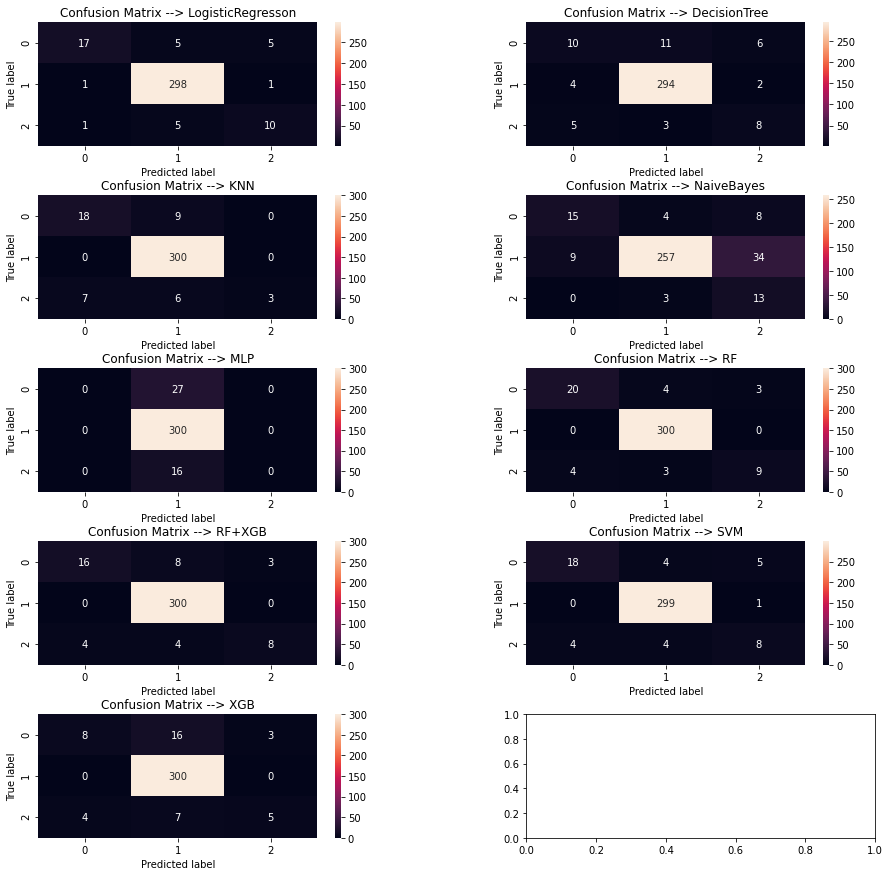

<Figure size 432x288 with 0 Axes>

In [8]:
# Plotting the Confusion Matrix
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

fig3, sub1 = plt.subplots(5, 2, figsize=(15, 15))
plt.subplots_adjust(wspace=0.4, hspace=0.4)
class_names=['COVID-19','Normal', 'Not Covid']
for clf, ax, title in zip(methods, sub1.flatten(), titles):
    y_predicted = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_predicted)
    #plot_confusion_matrix(ax, cm, title)
    df_cm = pd.DataFrame(cm, index = [i for i in "012"],
                  columns = [i for i in "012"])
    sns.heatmap(df_cm, annot=True, ax=ax, fmt = 'd')
    ax.set_title('Confusion Matrix --> ' + title)
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')
    fScore = f1_score(y_test, y_predicted ,average=None)
    precision = precision_score(y_test, y_predicted ,average=None)
    recall = recall_score(y_test, y_predicted ,average=None)
    
    numpy_data = np.array([fScore,precision,recall]) 
    df = pd.DataFrame(data=numpy_data, index=["F1-Score", "Precisão","Recall"], columns = class_names)
    print(title )
    print(df)
    print('\n')

plt.show()
plt.tight_layout()

## Resultados 
### O melhor resultado foi utiliazando o metodo SVM. 

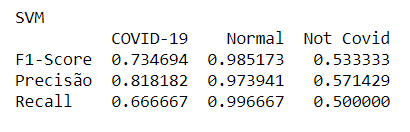

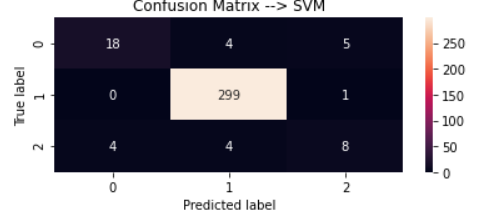

## Predição de casos reais 

In [9]:
df_to_be_scored = pd.read_csv(r'feature_matrix_desafio-covid-multimedia.csv')
df_to_be_scored_1 = df_to_be_scored.drop(columns=['class'], inplace=False)
df_to_be_scored_1.tail()
y_pred = rf.predict(df_to_be_scored_1)
df_to_be_scored_1['class'] = y_pred
df_to_be_scored_1.tail()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,class
0,0.032307,0.006702,0.002085,0.007640,0.002498,0.009010,0.002111,0.005434,0.001478,0.002021,...,3.815792e-03,0.003730,0.004978,0.005959,5.535499e-03,0.007128,0.006514,0.628233,0.107663,COVID-19
1,0.000171,0.000052,0.000021,0.000072,0.000017,0.000048,0.000008,0.000032,0.000012,0.000017,...,1.919338e-05,0.000118,0.000042,0.000297,5.758015e-05,0.000282,0.000036,0.992252,0.000947,COVID-19
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,9.982192e-07,0.000046,0.000001,0.000051,9.982192e-07,0.000047,0.000002,0.995264,0.000006,COVID-19
3,0.000069,0.000019,0.000002,0.000020,0.000006,0.000040,0.000004,0.000025,0.000003,0.000006,...,4.200000e-05,0.000228,0.000042,0.000197,3.411111e-05,0.000239,0.000059,0.993654,0.001150,COVID-19


## Treinamento com Smote apenas

In [10]:
#pegar csv com features 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
strategy = {'COVID-19': 350, 'Not Covid': 350} 
oversample = SMOTE(sampling_strategy=strategy, k_neighbors=5)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42, stratify=y)
X_train, y_train = oversample.fit_resample(X_train, y_train)
print(Counter(y_train))

Counter({'Normal': 700, 'COVID-19': 350, 'Not Covid': 350})


In [11]:
scores = []
for method, name in zip(methods, titles):
    method.fit(X_train, y_train)
    scores.append(method.score(X_test, y_test))
    print("Classification accuracy {} = {}"
          .format(name, method.score(X_test, y_test)))
print(scores)

C:\Users\cinth\anaconda3\envs\ML\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Classification accuracy LogisticRegresson = 0.9125364431486881
Classification accuracy DecisionTree = 0.8833819241982507
Classification accuracy KNN = 0.956268221574344
Classification accuracy NaiveBayes = 0.7900874635568513
Classification accuracy MLP = 0.8746355685131195
Classification accuracy RF = 0.9737609329446064
Classification accuracy RF+XGB = 0.9620991253644315
Classification accuracy SVM = 0.9300291545189504
Classification accuracy XGB = 0.9446064139941691
[0.9125364431486881, 0.8833819241982507, 0.956268221574344, 0.7900874635568513, 0.8746355685131195, 0.9737609329446064, 0.9620991253644315, 0.9300291545189504, 0.9446064139941691]


LogisticRegresson
          COVID-19    Normal  Not Covid
F1-Score  0.612903  0.957411   0.702703
Precisão  0.542857  0.979094   0.619048
Recall    0.703704  0.936667   0.812500


DecisionTree
          COVID-19    Normal  Not Covid
F1-Score  0.529412  0.949914   0.512821
Precisão  0.439024  0.985663   0.434783
Recall    0.666667  0.916667   0.625000


KNN
          COVID-19    Normal  Not Covid
F1-Score  0.792453  0.988391   0.600000
Precisão  0.807692  0.983498   0.642857
Recall    0.777778  0.993333   0.562500


NaiveBayes
          COVID-19    Normal  Not Covid
F1-Score  0.551724  0.882784   0.341463
Precisão  0.516129  0.979675   0.212121
Recall    0.592593  0.803333   0.875000




C:\Users\cinth\anaconda3\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


MLP
          COVID-19    Normal  Not Covid
F1-Score       0.0  0.933126        0.0
Precisão       0.0  0.874636        0.0
Recall         0.0  1.000000        0.0


RF
          COVID-19    Normal  Not Covid
F1-Score  0.846154  0.993333   0.823529
Precisão  0.880000  0.993333   0.777778
Recall    0.814815  0.993333   0.875000


RF+XGB
          COVID-19    Normal  Not Covid
F1-Score  0.807692  0.991625   0.702703
Precisão  0.840000  0.996633   0.619048
Recall    0.777778  0.986667   0.812500


SVM
          COVID-19    Normal  Not Covid
F1-Score  0.627451  0.976667   0.571429
Precisão  0.666667  0.976667   0.526316
Recall    0.592593  0.976667   0.625000


XGB
          COVID-19    Normal  Not Covid
F1-Score  0.716981  0.984925   0.611111
Precisão  0.730769  0.989899   0.550000
Recall    0.703704  0.980000   0.687500




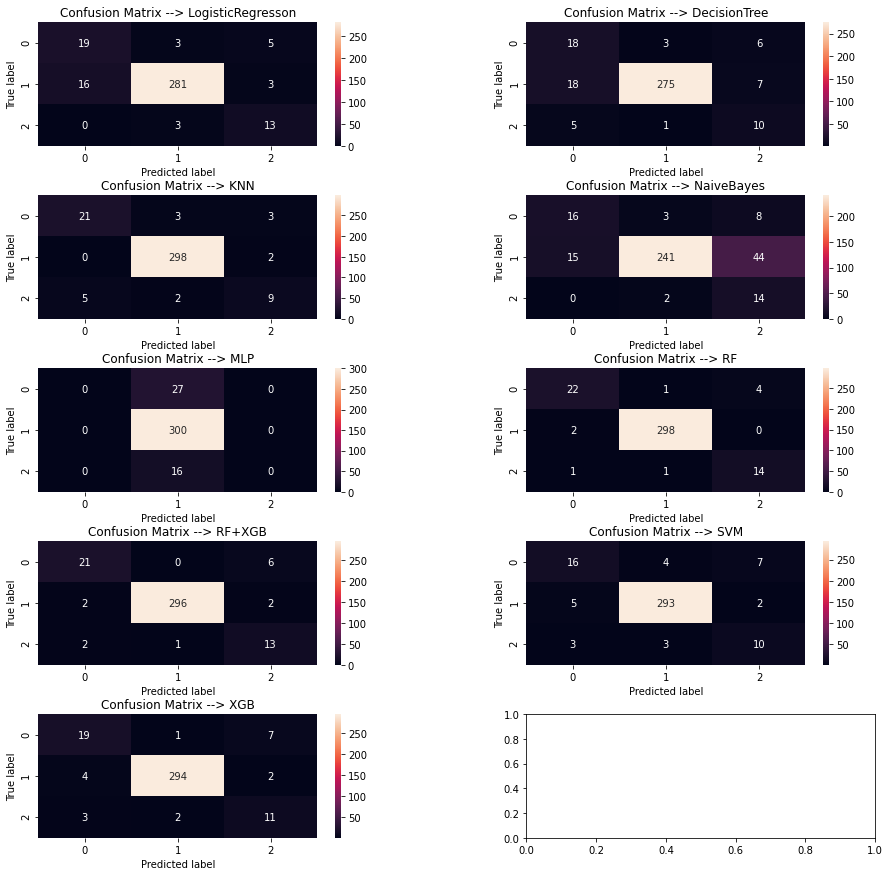

<Figure size 432x288 with 0 Axes>

In [12]:
# Plotting the Confusion Matrix
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

fig3, sub1 = plt.subplots(5, 2, figsize=(15, 15))
plt.subplots_adjust(wspace=0.4, hspace=0.4)
class_names=['COVID-19','Normal', 'Not Covid']
for clf, ax, title in zip(methods, sub1.flatten(), titles):
    y_predicted = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_predicted)
    #plot_confusion_matrix(ax, cm, title)
    df_cm = pd.DataFrame(cm, index = [i for i in "012"],
                  columns = [i for i in "012"])
    sns.heatmap(df_cm, annot=True, ax=ax, fmt = 'd')
    ax.set_title('Confusion Matrix --> ' + title)
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')
    fScore = f1_score(y_test, y_predicted ,average=None)
    precision = precision_score(y_test, y_predicted ,average=None)
    recall = recall_score(y_test, y_predicted ,average=None)
    
    numpy_data = np.array([fScore,precision,recall]) 
    df = pd.DataFrame(data=numpy_data, index=["F1-Score", "Precisão","Recall"], columns = class_names)
    print(title )
    print(df)
    print('\n')

plt.show()
plt.tight_layout()

## Resultados do Smote 
### Melhor metodo neste caso foi o Random Forest. Para smote k=5. 

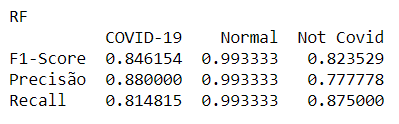

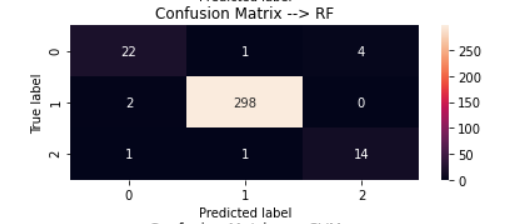

## Resultados com 3 valores de  Ks
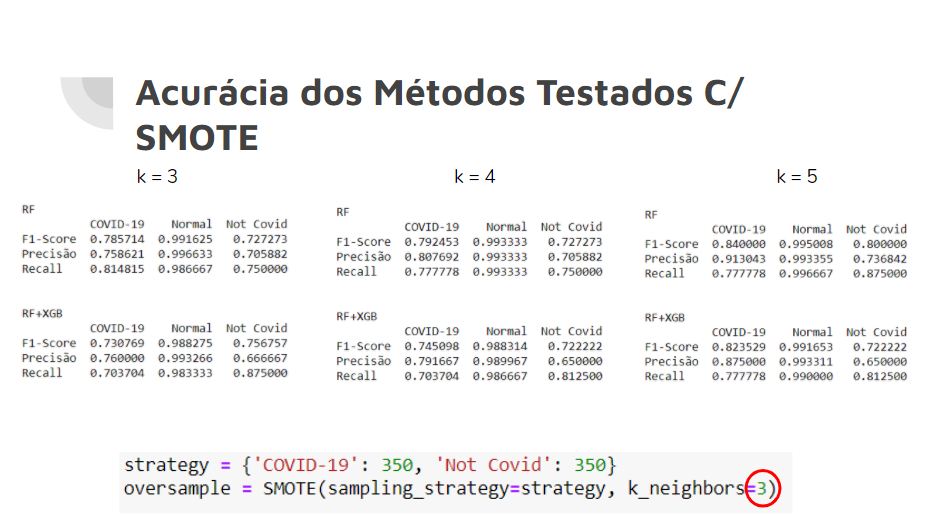

## Resultado de caso real

## Treinamento com Tomek Link

In [20]:
#pegar csv com features 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from collections import Counter
strategy = {'COVID-19': 350, 'Not Covid': 350} 
oversample = SMOTETomek(smote=SMOTE(sampling_strategy=strategy, k_neighbors=5))

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42, stratify=y)
X_train, y_train = oversample.fit_resample(X_train, y_train)

print(Counter(y_train))


Counter({'Normal': 699, 'Not Covid': 350, 'COVID-19': 349})


In [21]:
scores = []
for method, name in zip(methods, titles):
    method.fit(X_train, y_train)
    scores.append(method.score(X_test, y_test))
    print("Classification accuracy {} = {}"
          .format(name, method.score(X_test, y_test)))
print(scores)

C:\Users\cinth\anaconda3\envs\ML\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Classification accuracy LogisticRegresson = 0.9096209912536443
Classification accuracy DecisionTree = 0.9067055393586005
Classification accuracy KNN = 0.9533527696793003
Classification accuracy NaiveBayes = 0.7900874635568513
Classification accuracy MLP = 0.07871720116618076
Classification accuracy RF = 0.9737609329446064
Classification accuracy RF+XGB = 0.9504373177842566
Classification accuracy SVM = 0.9300291545189504
Classification accuracy XGB = 0.9358600583090378
[0.9096209912536443, 0.9067055393586005, 0.9533527696793003, 0.7900874635568513, 0.07871720116618076, 0.9737609329446064, 0.9504373177842566, 0.9300291545189504, 0.9358600583090378]


LogisticRegresson
          COVID-19    Normal  Not Covid
F1-Score  0.625000  0.954160   0.666667
Precisão  0.540541  0.972318   0.647059
Recall    0.740741  0.936667   0.687500


DecisionTree
          COVID-19    Normal  Not Covid
F1-Score  0.548387  0.969388     0.5000
Precisão  0.485714  0.989583     0.4500
Recall    0.629630  0.950000     0.5625


KNN
          COVID-19    Normal  Not Covid
F1-Score  0.792453  0.986711   0.580645
Precisão  0.807692  0.983444   0.600000
Recall    0.777778  0.990000   0.562500


NaiveBayes
          COVID-19    Normal  Not Covid
F1-Score  0.566038  0.883636   0.313253
Precisão  0.576923  0.972000   0.194030
Recall    0.555556  0.810000   0.812500




C:\Users\cinth\anaconda3\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


MLP
          COVID-19  Normal  Not Covid
F1-Score  0.145946     0.0        0.0
Precisão  0.078717     0.0        0.0
Recall    1.000000     0.0        0.0


RF
          COVID-19    Normal  Not Covid
F1-Score  0.840000  0.995025   0.787879
Precisão  0.913043  0.990099   0.764706
Recall    0.777778  1.000000   0.812500


RF+XGB
          COVID-19    Normal  Not Covid
F1-Score  0.716981  0.988314   0.647059
Precisão  0.730769  0.989967   0.611111
Recall    0.703704  0.986667   0.687500


SVM
          COVID-19    Normal  Not Covid
F1-Score  0.653846  0.974958   0.571429
Precisão  0.680000  0.976589   0.526316
Recall    0.629630  0.973333   0.625000


XGB
          COVID-19    Normal  Not Covid
F1-Score  0.654545  0.979866   0.628571
Precisão  0.642857  0.986486   0.578947
Recall    0.666667  0.973333   0.687500




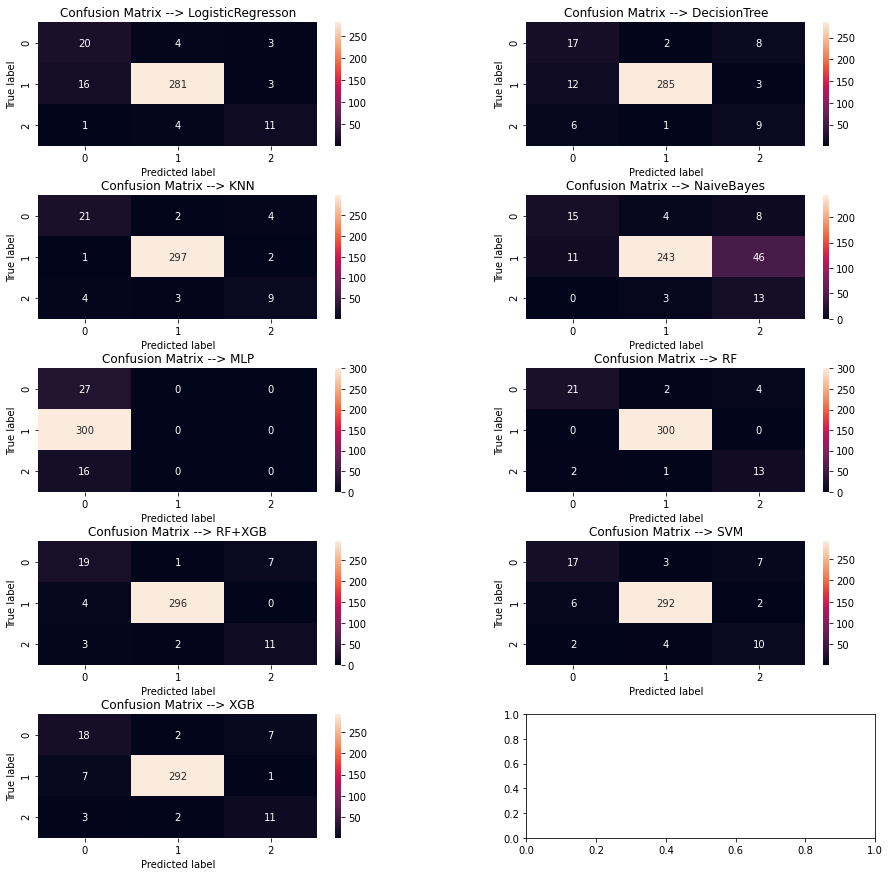

<Figure size 432x288 with 0 Axes>

In [22]:
# Plotting the Confusion Matrix
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

fig3, sub1 = plt.subplots(5, 2, figsize=(15, 15))
plt.subplots_adjust(wspace=0.4, hspace=0.4)
class_names=['COVID-19','Normal', 'Not Covid']
for clf, ax, title in zip(methods, sub1.flatten(), titles):
    y_predicted = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_predicted)
    #plot_confusion_matrix(ax, cm, title)
    df_cm = pd.DataFrame(cm, index = [i for i in "012"],
                  columns = [i for i in "012"])
    sns.heatmap(df_cm, annot=True, ax=ax, fmt = 'd')
    ax.set_title('Confusion Matrix --> ' + title)
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')
    fScore = f1_score(y_test, y_predicted ,average=None)
    precision = precision_score(y_test, y_predicted ,average=None)
    recall = recall_score(y_test, y_predicted ,average=None)
    
    numpy_data = np.array([fScore,precision,recall]) 
    df = pd.DataFrame(data=numpy_data, index=["F1-Score", "Precisão","Recall"], columns = class_names)
    print(title )
    print(df)
    print('\n')

plt.show()
plt.tight_layout()

## Melhores Resultados 
### Tomek 
 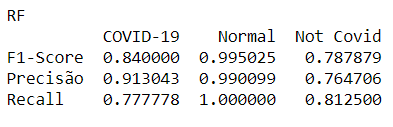

### Apenas Smote
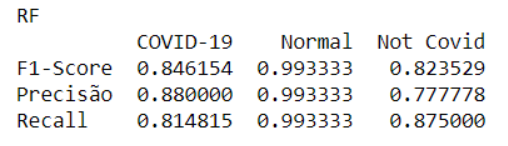

### Sem Smote e sem Tomek 
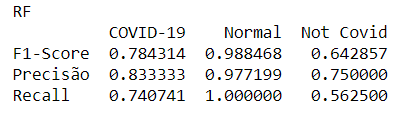

## Com base nos dados a melhor opção seria utilizar o modelo Random Forest com apenas a aplicação do smote, k=5. 


## Teste com base real
